<a href="https://colab.research.google.com/github/jasvithaBuggana/Analyzing-Layoff-Patterns-From-Data-to-Insights/blob/main/Layoffs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

%matplotlib inline
#renders the figure in a notebook
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px


The dataset contains information about layoffs across various companies, containing the following attributes:

1. **Company**: Denotes the name of the company where the layoffs occurred.
2. **Location_HQ**: Indicates the headquarters location of the company.
3. **Industry**: Describes the sector or industry to which the company belongs.
4. **Laid_Off_Count**: Reflects the number of employees affected by the layoffs within the company.
5. **Percentage**: Represents the proportion of the company's workforce that was subject to layoffs.
6. **Date**: Specifies the date when the layoffs were executed.
7. **Funds_Raised**: Provides details regarding the amount of funds raised by the company.
8. **Stage**: Illustrates the developmental or growth stage of the company.
9. **Country**: Specifies the country in which the company is situated.

## Analysis on Layoff Data (2020-2024):

### 1.What are the primary industries experiencing layoffs, and are there any common factors among them?
### 2.What Are the Top Layoff Industries by Country and visualize the top 6 layoff Industries in each Country?
### 3.Which Industries Experienced Layoffs in the Year 2020, and How Did This Vary Across Different Countries?
### 4.Which Industries Experienced the Highest Number of Layoffs in the Years 2020, 2021, 2023, and 2024 Across  the Countries of the United States, India, Germany, and the United Kingdom?
### 5.Is there a correlation between the stage of company development and the likelihood of layoffs?
### 6.How does the layoff trend vary over different time periods?
### 7.What is the distribution of layoffs across different days of the week, and which day experiences the highest occurrence of layoffs?
### 8.Identifying the ten companies with the highest number of layoffs.
### 9.Identifying Top 15 Location_HQ with highest layoffs?
### 10.How does the company's stage of development (e.g., early-stage, growth-stage) relate to the layoff count?
### 11.Is there a correlation between the percentage of layoffs and the amount of funds raised by the company?
### 12.Are there any outliers in the Layoff Count?
### 13.How do different stages of company development compare in terms of layoff counts, percentage of layoffs, and funds raised?
### 14.Which country had the highest layoffs?
### 15.Let's do more analysis on the 'United States' country.

In [3]:
df=pd.read_csv('/content/layoffs.csv')

In [4]:
df.head()

company   location   industry  total_laid_off  percentage_laid_off  \
0         UKG     Boston         HR          2200.0                 0.14   
1    OpenText   Waterloo       Data          1200.0                 0.02   
2   Unacademy  Bengaluru  Education           250.0                  NaN   
3         Koo  Bengaluru   Consumer             NaN                 1.00   
4  Lightricks  Jerusalem   Consumer            70.0                 0.12   

         date     stage        country  funds_raised  
0  2024-07-03   Unknown  United States           NaN  
1  2024-07-03  Post-IPO         Canada        1100.0  
2  2024-07-02  Series H          India         838.0  
3  2024-07-02   Unknown          India          51.0  
4  2024-07-01  Series D         Israel         335.0

In [5]:
df.shape

(3693, 9)

In [6]:
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [7]:
total = df['total_laid_off'].sum()
total

629680.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3693 non-null   object 
 1   location             3692 non-null   object 
 2   industry             3692 non-null   object 
 3   total_laid_off       2423 non-null   float64
 4   percentage_laid_off  2373 non-null   float64
 5   date                 3693 non-null   object 
 6   stage                3686 non-null   object 
 7   country              3693 non-null   object 
 8   funds_raised         3297 non-null   float64
dtypes: float64(3), object(6)
memory usage: 259.8+ KB


Data should be cleaned


In [9]:
df.describe()

total_laid_off  percentage_laid_off   funds_raised
count     2423.000000          2373.000000    3297.000000
mean       259.876187             0.282553     798.262358
std        828.069041             0.288863    4729.482859
min          3.000000             0.000000       0.000000
25%         40.000000             0.100000      52.000000
50%         80.000000             0.170000     167.000000
75%        188.000000             0.300000     472.000000
max      14000.000000             1.000000  121900.000000

In [10]:
df.drop_duplicates()

company        location        industry  total_laid_off  \
0               UKG          Boston              HR          2200.0   
1          OpenText        Waterloo            Data          1200.0   
2         Unacademy       Bengaluru       Education           250.0   
3               Koo       Bengaluru        Consumer             NaN   
4        Lightricks       Jerusalem        Consumer            70.0   
...             ...             ...             ...             ...   
3688        Service     Los Angeles          Travel             NaN   
3689   HopSkipDrive     Los Angeles  Transportation             8.0   
3690    Panda Squad     SF Bay Area        Consumer             6.0   
3691  Tamara Mellon     Los Angeles          Retail            20.0   
3692       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off        date     stage        country  funds_raised  
0                    0.14  2024-07-03   Unknown  United States           NaN  
1                    0.02  2024-07-03  Post-IPO         Canada        1100.0  
2                     NaN  2024-07-02  Series H          India         838.0  
3                    1.00  2024-07-02   Unknown          India          51.0  
4                    0.12  2024-07-01  Series D         Israel         335.0  
...                   ...         ...       ...            ...           ...  
3688                 1.00  2020-03-16      Seed  United States           5.1  
3689                 0.10  2020-03-13   Unknown  United States          45.0  
3690                 0.75  2020-03-13      Seed  United States           1.0  
3691                 0.40  2020-03-12  Series C  United States          90.0  
3692                  NaN  2020-03-11  Series A  United States          12.0  

[3691 rows x 9 columns]

# Data cleaning

In [11]:
df.tail()

company        location        industry  total_laid_off  \
3688        Service     Los Angeles          Travel             NaN   
3689   HopSkipDrive     Los Angeles  Transportation             8.0   
3690    Panda Squad     SF Bay Area        Consumer             6.0   
3691  Tamara Mellon     Los Angeles          Retail            20.0   
3692       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off        date     stage        country  funds_raised  
3688                 1.00  2020-03-16      Seed  United States           5.1  
3689                 0.10  2020-03-13   Unknown  United States          45.0  
3690                 0.75  2020-03-13      Seed  United States           1.0  
3691                 0.40  2020-03-12  Series C  United States          90.0  
3692                  NaN  2020-03-11  Series A  United States          12.0

In [12]:
# "Cleaning" the data -- part 1: converting data types that should be categorical into "category"
df['company'] = df['company'].astype('category')
df['location'] = df['location'].astype('category')
df['industry'] = df['industry'].astype('category')
df['stage'] = df['stage'].astype('category')
df['country'] = df['country'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   company              3693 non-null   category
 1   location             3692 non-null   category
 2   industry             3692 non-null   category
 3   total_laid_off       2423 non-null   float64 
 4   percentage_laid_off  2373 non-null   float64 
 5   date                 3693 non-null   object  
 6   stage                3686 non-null   category
 7   country              3693 non-null   category
 8   funds_raised         3297 non-null   float64 
dtypes: category(5), float64(3), object(1)
memory usage: 240.3+ KB


Spliting 'Date' column into 4 different columns (Year, Month, Day, Quarter)

In [13]:
# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Extract quarter into a separate column
df['quarter'] = df['date'].dt.quarter



In [14]:
df.head()

company   location   industry  total_laid_off  percentage_laid_off  \
0         UKG     Boston         HR          2200.0                 0.14   
1    OpenText   Waterloo       Data          1200.0                 0.02   
2   Unacademy  Bengaluru  Education           250.0                  NaN   
3         Koo  Bengaluru   Consumer             NaN                 1.00   
4  Lightricks  Jerusalem   Consumer            70.0                 0.12   

        date     stage        country  funds_raised  year  month  day  quarter  
0 2024-07-03   Unknown  United States           NaN  2024      7    3        3  
1 2024-07-03  Post-IPO         Canada        1100.0  2024      7    3        3  
2 2024-07-02  Series H          India         838.0  2024      7    2        3  
3 2024-07-02   Unknown          India          51.0  2024      7    2        3  
4 2024-07-01  Series D         Israel         335.0  2024      7    1        3

In [15]:
df = df.drop(columns = ['date'])
df

company        location        industry  total_laid_off  \
0               UKG          Boston              HR          2200.0   
1          OpenText        Waterloo            Data          1200.0   
2         Unacademy       Bengaluru       Education           250.0   
3               Koo       Bengaluru        Consumer             NaN   
4        Lightricks       Jerusalem        Consumer            70.0   
...             ...             ...             ...             ...   
3688        Service     Los Angeles          Travel             NaN   
3689   HopSkipDrive     Los Angeles  Transportation             8.0   
3690    Panda Squad     SF Bay Area        Consumer             6.0   
3691  Tamara Mellon     Los Angeles          Retail            20.0   
3692       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off     stage        country  funds_raised  year  month  \
0                    0.14   Unknown  United States           NaN  2024      7   
1                    0.02  Post-IPO         Canada        1100.0  2024      7   
2                     NaN  Series H          India         838.0  2024      7   
3                    1.00   Unknown          India          51.0  2024      7   
4                    0.12  Series D         Israel         335.0  2024      7   
...                   ...       ...            ...           ...   ...    ...   
3688                 1.00      Seed  United States           5.1  2020      3   
3689                 0.10   Unknown  United States          45.0  2020      3   
3690                 0.75      Seed  United States           1.0  2020      3   
3691                 0.40  Series C  United States          90.0  2020      3   
3692                  NaN  Series A  United States          12.0  2020      3   

      day  quarter  
0       3        3  
1       3        3  
2       2        3  
3       2        3  
4       1        3  
...   ...      ...  
3688   16        1  
3689   13        1  
3690   13        1  
3691   12        1  
3692   11        1  

[3693 rows x 12 columns]

In [16]:
df.tail()

company        location        industry  total_laid_off  \
3688        Service     Los Angeles          Travel             NaN   
3689   HopSkipDrive     Los Angeles  Transportation             8.0   
3690    Panda Squad     SF Bay Area        Consumer             6.0   
3691  Tamara Mellon     Los Angeles          Retail            20.0   
3692       EasyPost  Salt Lake City       Logistics            75.0   

      percentage_laid_off     stage        country  funds_raised  year  month  \
3688                 1.00      Seed  United States           5.1  2020      3   
3689                 0.10   Unknown  United States          45.0  2020      3   
3690                 0.75      Seed  United States           1.0  2020      3   
3691                 0.40  Series C  United States          90.0  2020      3   
3692                  NaN  Series A  United States          12.0  2020      3   

      day  quarter  
3688   16        1  
3689   13        1  
3690   13        1  
3691   12        1  
3692   11        1

In [17]:
# "Cleaning" the data -- part 2: replacing/imputing missing data
df.isna().sum() # Lets check if we have any missing data

company                   0
location                  1
industry                  1
total_laid_off         1270
percentage_laid_off    1320
stage                     7
country                   0
funds_raised            396
year                      0
month                     0
day                       0
quarter                   0
dtype: int64

In [18]:
df.isna().mean()*100

company                 0.000000
location                0.027078
industry                0.027078
total_laid_off         34.389385
percentage_laid_off    35.743298
stage                   0.189548
country                 0.000000
funds_raised           10.722989
year                    0.000000
month                   0.000000
day                     0.000000
quarter                 0.000000
dtype: float64

In [19]:
# "Cleaning" the data -- part 3
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Create an imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='median')

# Fill missing values in numeric columns with median
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Create an imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values in categorical columns with the most frequent value
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Display the filled DataFrame
df_cleaned = df
df_cleaned.head()


company   location   industry  total_laid_off  percentage_laid_off  \
0         UKG     Boston         HR          2200.0                 0.14   
1    OpenText   Waterloo       Data          1200.0                 0.02   
2   Unacademy  Bengaluru  Education           250.0                 0.17   
3         Koo  Bengaluru   Consumer            80.0                 1.00   
4  Lightricks  Jerusalem   Consumer            70.0                 0.12   

      stage        country  funds_raised    year  month  day  quarter  
0   Unknown  United States         167.0  2024.0    7.0  3.0      3.0  
1  Post-IPO         Canada        1100.0  2024.0    7.0  3.0      3.0  
2  Series H          India         838.0  2024.0    7.0  2.0      3.0  
3   Unknown          India          51.0  2024.0    7.0  2.0      3.0  
4  Series D         Israel         335.0  2024.0    7.0  1.0      3.0

In [20]:
# Convert the column to integer type
df_cleaned['total_laid_off'] = df_cleaned['total_laid_off'].astype(int)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3693 non-null   object 
 1   location             3693 non-null   object 
 2   industry             3693 non-null   object 
 3   total_laid_off       3693 non-null   int64  
 4   percentage_laid_off  3693 non-null   float64
 5   stage                3693 non-null   object 
 6   country              3693 non-null   object 
 7   funds_raised         3693 non-null   float64
 8   year                 3693 non-null   float64
 9   month                3693 non-null   float64
 10  day                  3693 non-null   float64
 11  quarter              3693 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 346.3+ KB


In [21]:
total = df_cleaned['total_laid_off'].sum()
total

731280

In [22]:
#replacing/imputing missing data

# For Numerical features: replacing with 0

# fixing numericals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=0)
imputer.fit(df.select_dtypes(include=['float64']))
df[df.select_dtypes(include=['float64']).columns] = imputer.transform(df.select_dtypes(include=['float64']))

# Lets examine the result
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
stage                  0
country                0
funds_raised           0
year                   0
month                  0
day                    0
quarter                0
dtype: int64

In [23]:
df.head()

company   location   industry  total_laid_off  percentage_laid_off  \
0         UKG     Boston         HR            2200                 0.14   
1    OpenText   Waterloo       Data            1200                 0.02   
2   Unacademy  Bengaluru  Education             250                 0.17   
3         Koo  Bengaluru   Consumer              80                 1.00   
4  Lightricks  Jerusalem   Consumer              70                 0.12   

      stage        country  funds_raised    year  month  day  quarter  
0   Unknown  United States         167.0  2024.0    7.0  3.0      3.0  
1  Post-IPO         Canada        1100.0  2024.0    7.0  3.0      3.0  
2  Series H          India         838.0  2024.0    7.0  2.0      3.0  
3   Unknown          India          51.0  2024.0    7.0  2.0      3.0  
4  Series D         Israel         335.0  2024.0    7.0  1.0      3.0

In [24]:
df_cleaned.head()

company   location   industry  total_laid_off  percentage_laid_off  \
0         UKG     Boston         HR            2200                 0.14   
1    OpenText   Waterloo       Data            1200                 0.02   
2   Unacademy  Bengaluru  Education             250                 0.17   
3         Koo  Bengaluru   Consumer              80                 1.00   
4  Lightricks  Jerusalem   Consumer              70                 0.12   

      stage        country  funds_raised    year  month  day  quarter  
0   Unknown  United States         167.0  2024.0    7.0  3.0      3.0  
1  Post-IPO         Canada        1100.0  2024.0    7.0  3.0      3.0  
2  Series H          India         838.0  2024.0    7.0  2.0      3.0  
3   Unknown          India          51.0  2024.0    7.0  2.0      3.0  
4  Series D         Israel         335.0  2024.0    7.0  1.0      3.0

In [25]:
df_cleaned.to_csv('C:\\Users\\jasvi\\Downloads\\Layoff_Project\\Median_layoffdata.csv', index=False)
df.to_csv('C:\\Users\\jasvi\\Downloads\\Layoff_Project\\layoffdata_0.csv', index=False)

The DataFrame `df` has its missing values replaced with '0'.
The DataFrame `df_cleaned` has its missing values replaced with the median of each column.

# Data Visualization

## 1. What are the primary industries experiencing layoffs, and are there any common factors among them?

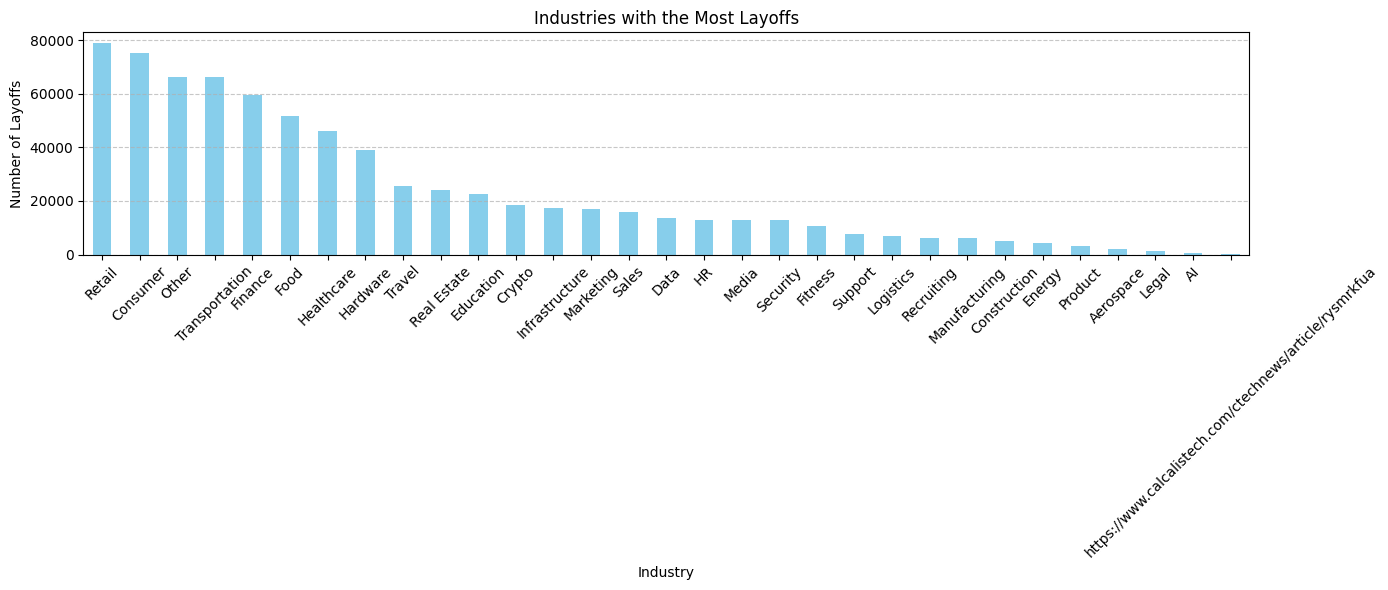

In [27]:
# Grouping by industry and summing the layoffs
industry_layoffs = df_cleaned.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

# Plotting bar chart for industries with the most layoffs
plt.figure(figsize=(14, 6))
industry_layoffs.plot(kind='bar', color='skyblue')
plt.title('Industries with the Most Layoffs')
plt.xlabel('Industry')
plt.ylabel('Number of Layoffs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Retail and Consumer Industries had experienced major layoffs overthe period from 2020-2024.

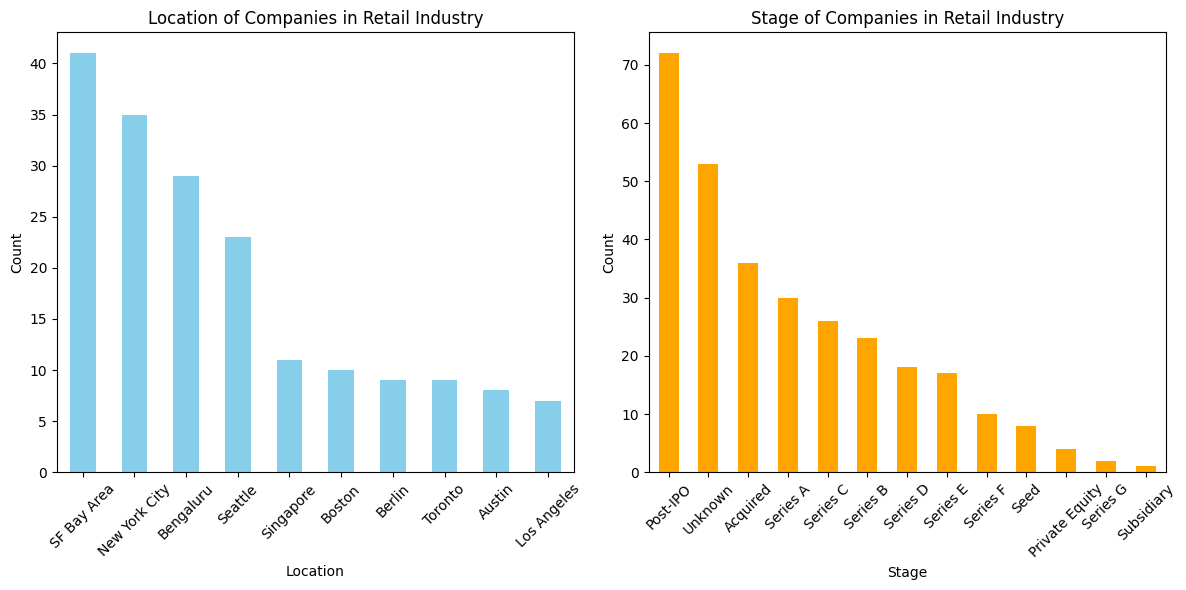

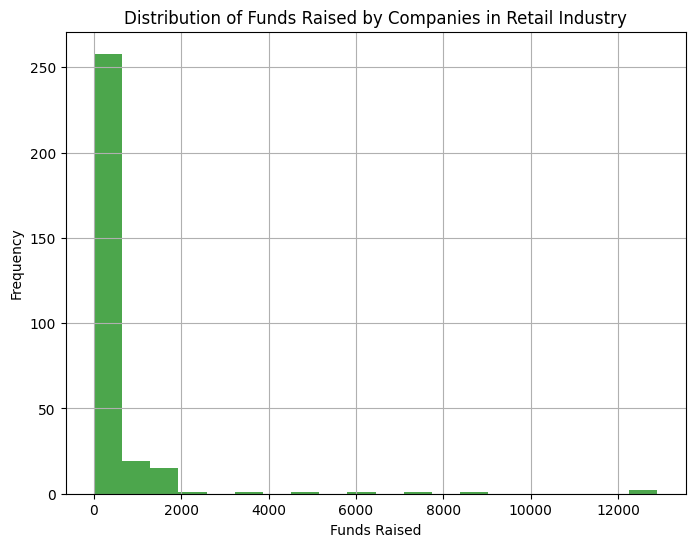

In [28]:
# Filter the dataset for the retail industry
retail_data = df_cleaned[df_cleaned['industry'] == 'Retail']

# Explore specific factors within the retail industry
# Example: Analyze location and stage of companies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
retail_data['location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Location of Companies in Retail Industry')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
retail_data['stage'].value_counts().plot(kind='bar', color='orange')
plt.title('Stage of Companies in Retail Industry')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot funds raised by companies in the retail industry
plt.figure(figsize=(8, 6))
plt.hist(retail_data['funds_raised'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Funds Raised by Companies in Retail Industry')
plt.xlabel('Funds Raised')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


United States has experienced the most layoffs in the years 2020-2024.

## 2. What Are the Top Layoff Industries by Country and visualize the top 6 layoff Industries in each Country?

In [29]:
# Get the list of unique countries in the dataset
unique_countries = df_cleaned['country'].unique()

# Loop through each country and analyze layoffs by industry
for country in unique_countries:
    # Filter the data for the current country
    country_data = df_cleaned[df_cleaned['country'] == country]

    # Grouping by Industry and calculating the total layoffs in each industry for the current country
    industry_layoffs = country_data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

    # Display the result
    print(f"Layoffs by Industry in {country}:")
    print(industry_layoffs)
    print("\n")


Layoffs by Industry in United States:
industry
Consumer          62240
Retail            54687
Transportation    47195
Other             38859
Hardware          37090
Finance           30940
Healthcare        30540
Real Estate       20721
Food              17607
Infrastructure    16904
Sales             15258
Travel            13074
HR                11193
Data              10817
Security          10722
Marketing         10174
Crypto             9523
Fitness            8517
Media              7187
Support            6723
Recruiting         5375
Education          4973
Logistics          4970
Construction       4050
Product            3083
Energy             2308
Manufacturing      1992
Aerospace          1317
Legal              1306
AI                  322
Name: total_laid_off, dtype: int64


Layoffs by Industry in Canada:
industry
Retail            4853
Data              1405
Finance           1097
Food               981
Marketing          972
Education          807
Other             

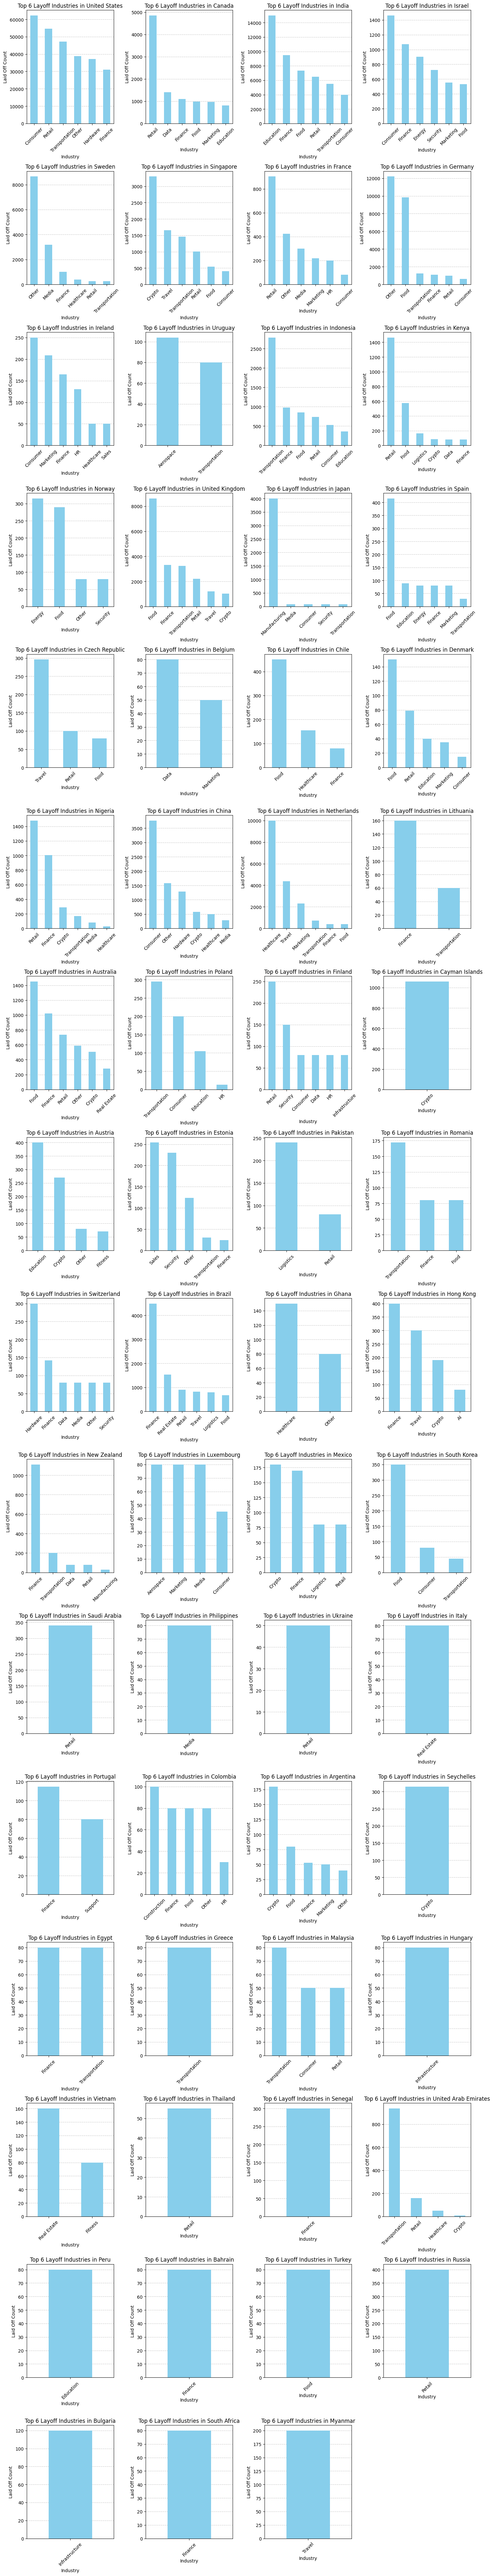

In [30]:

# Get the list of unique countries in the dataset
unique_countries = df_cleaned['country'].unique()

# Set the number of top industries to consider
top_n = 6

# Calculate the number of rows and columns for subplots
num_countries = len(unique_countries)
num_cols = 4  # Adjust the number of columns as desired
num_rows = (num_countries - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop through each country and plot bar graphs
for i, country in enumerate(unique_countries):
    # Filter the data for the current country
    country_data = df_cleaned[df_cleaned['country'] == country]

    # Grouping by industry and calculating the total layoffs in each industry for the current country
    industry_layoffs = country_data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

    # Get the top N industries for the current country
    top_industries = industry_layoffs.head(top_n)

    # Plotting the bar graph on the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    top_industries.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f"Top {top_n} Layoff Industries in {country}")
    ax.set_xlabel("Industry")
    ax.set_ylabel("Laid Off Count")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelleft=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

# Hide any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


From the graphs, we can observe that layoffs impacted different industries across various countries. In the United States, the Consumer and Retail sectors experienced the most significant job losses. Singapore saw the highest number of layoffs in the Crypto and Travel industries, while India witnessed a surge in layoffs within the Education and Food sectors. Similarly, Australia's Food and Finance industries were the most affected.

## 3. Which Industries Experienced Layoffs in the Year 2020, and How Did This Vary Across Different Countries?

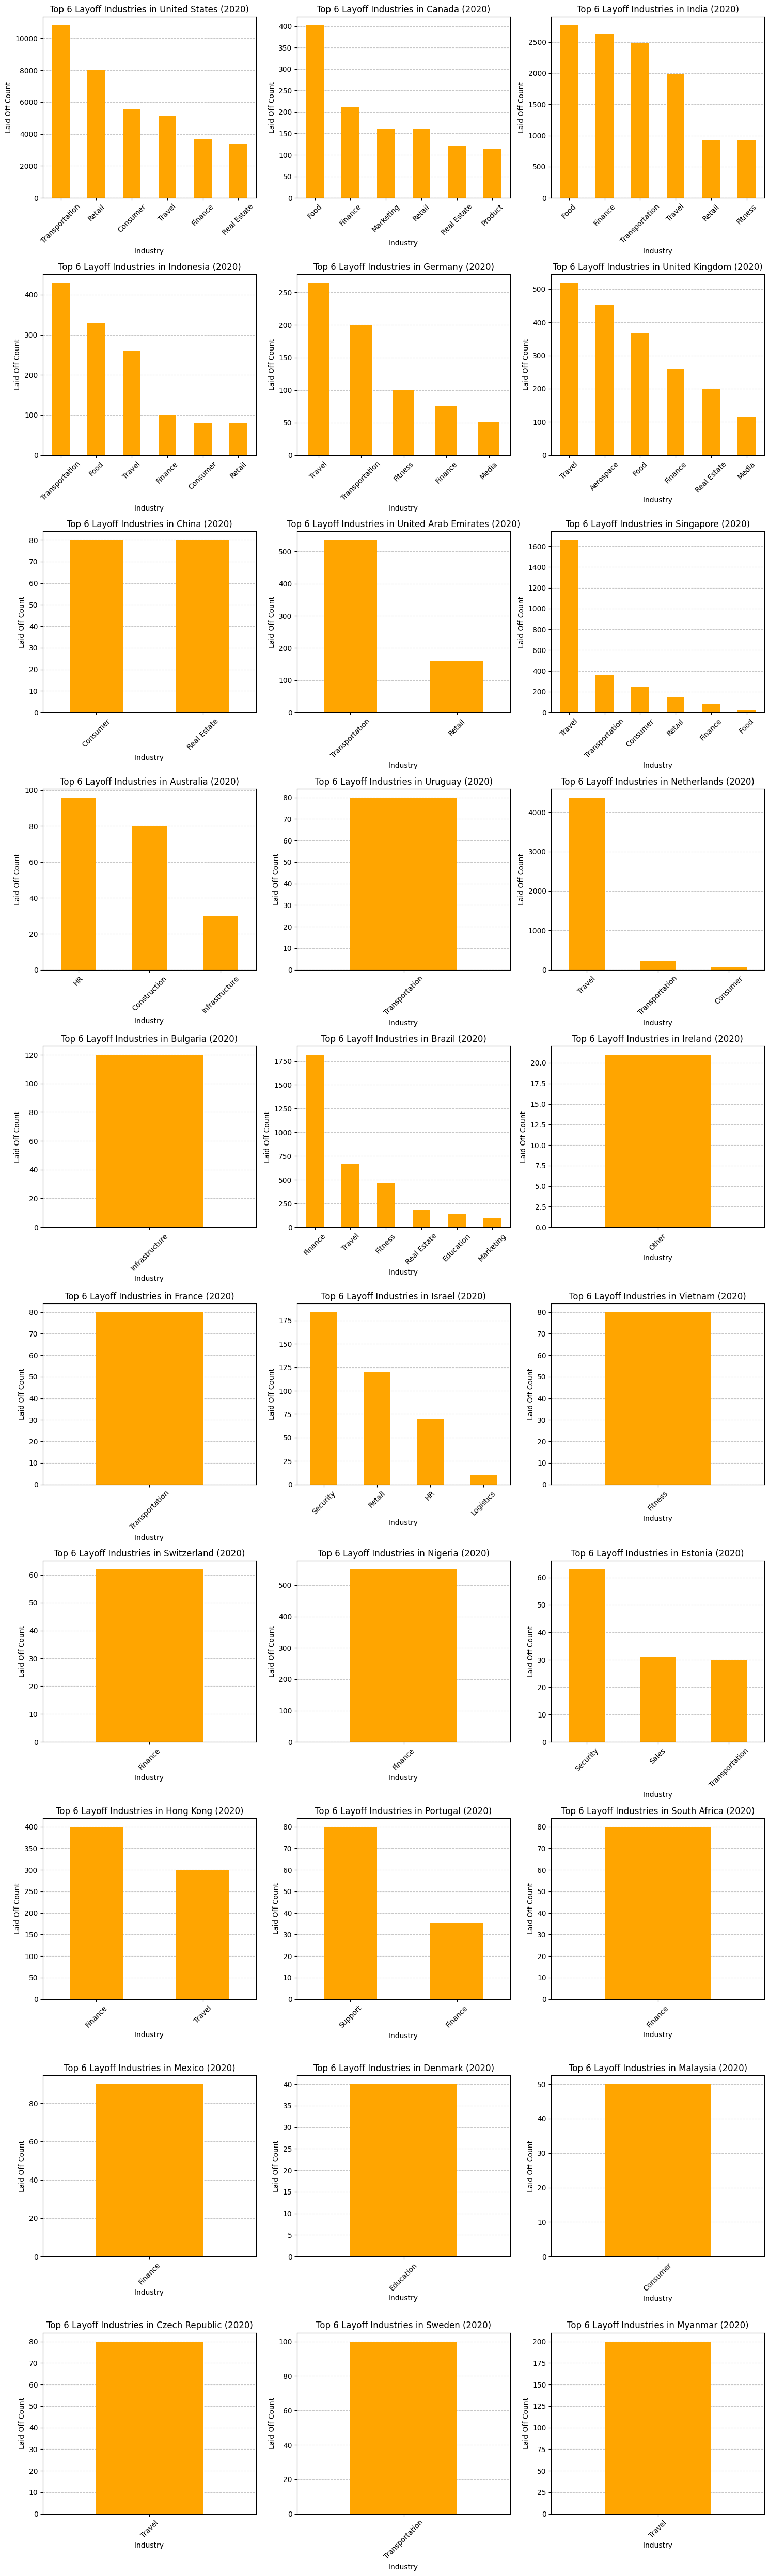

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for layoffs in 2020 based on the 'year' column
df_2020 = df_cleaned[df_cleaned['year'] == 2020]

# Get the list of unique countries in the dataset for 2020
unique_countries_2020 = df_2020['country'].unique()

# Set the number of top industries to consider
top_n = 6

# Calculate the number of rows and columns for subplots
num_countries_2020 = len(unique_countries_2020)
num_cols = 3  # Adjust the number of columns as desired
num_rows = (num_countries_2020 - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop through each country in 2020 and plot bar graphs
for i, country in enumerate(unique_countries_2020):
    # Filter the data for layoffs in the current country in 2020
    country_data_2020 = df_2020[df_2020['country'] == country]

    # Grouping by industry and calculating the total layoffs in each industry for the current country in 2020
    industry_layoffs_2020 = country_data_2020.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

    # Get the top N industries for the current country in 2020
    top_industries_2020 = industry_layoffs_2020.head(top_n)

    # Plotting the bar graph on the corresponding subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    top_industries_2020.plot(kind='bar', ax=ax, color='orange')
    ax.set_title(f"Top {top_n} Layoff Industries in {country} (2020)")
    ax.set_xlabel("Industry")
    ax.set_ylabel("Laid Off Count")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelleft=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

# Hide any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


Year 2020 (Covid Pandemic): In the United States, the Transportation and Retail industries were hit hardest by layoffs. Similarly, the Food and Finance sectors experienced significant job losses in both India and Canada.

## 4.Which Industries Experienced the Highest Number of Layoffs in the Years 2020, 2021, 2023, and 2024 Across the Countries of the United States, India, Germany, and the United Kingdom?

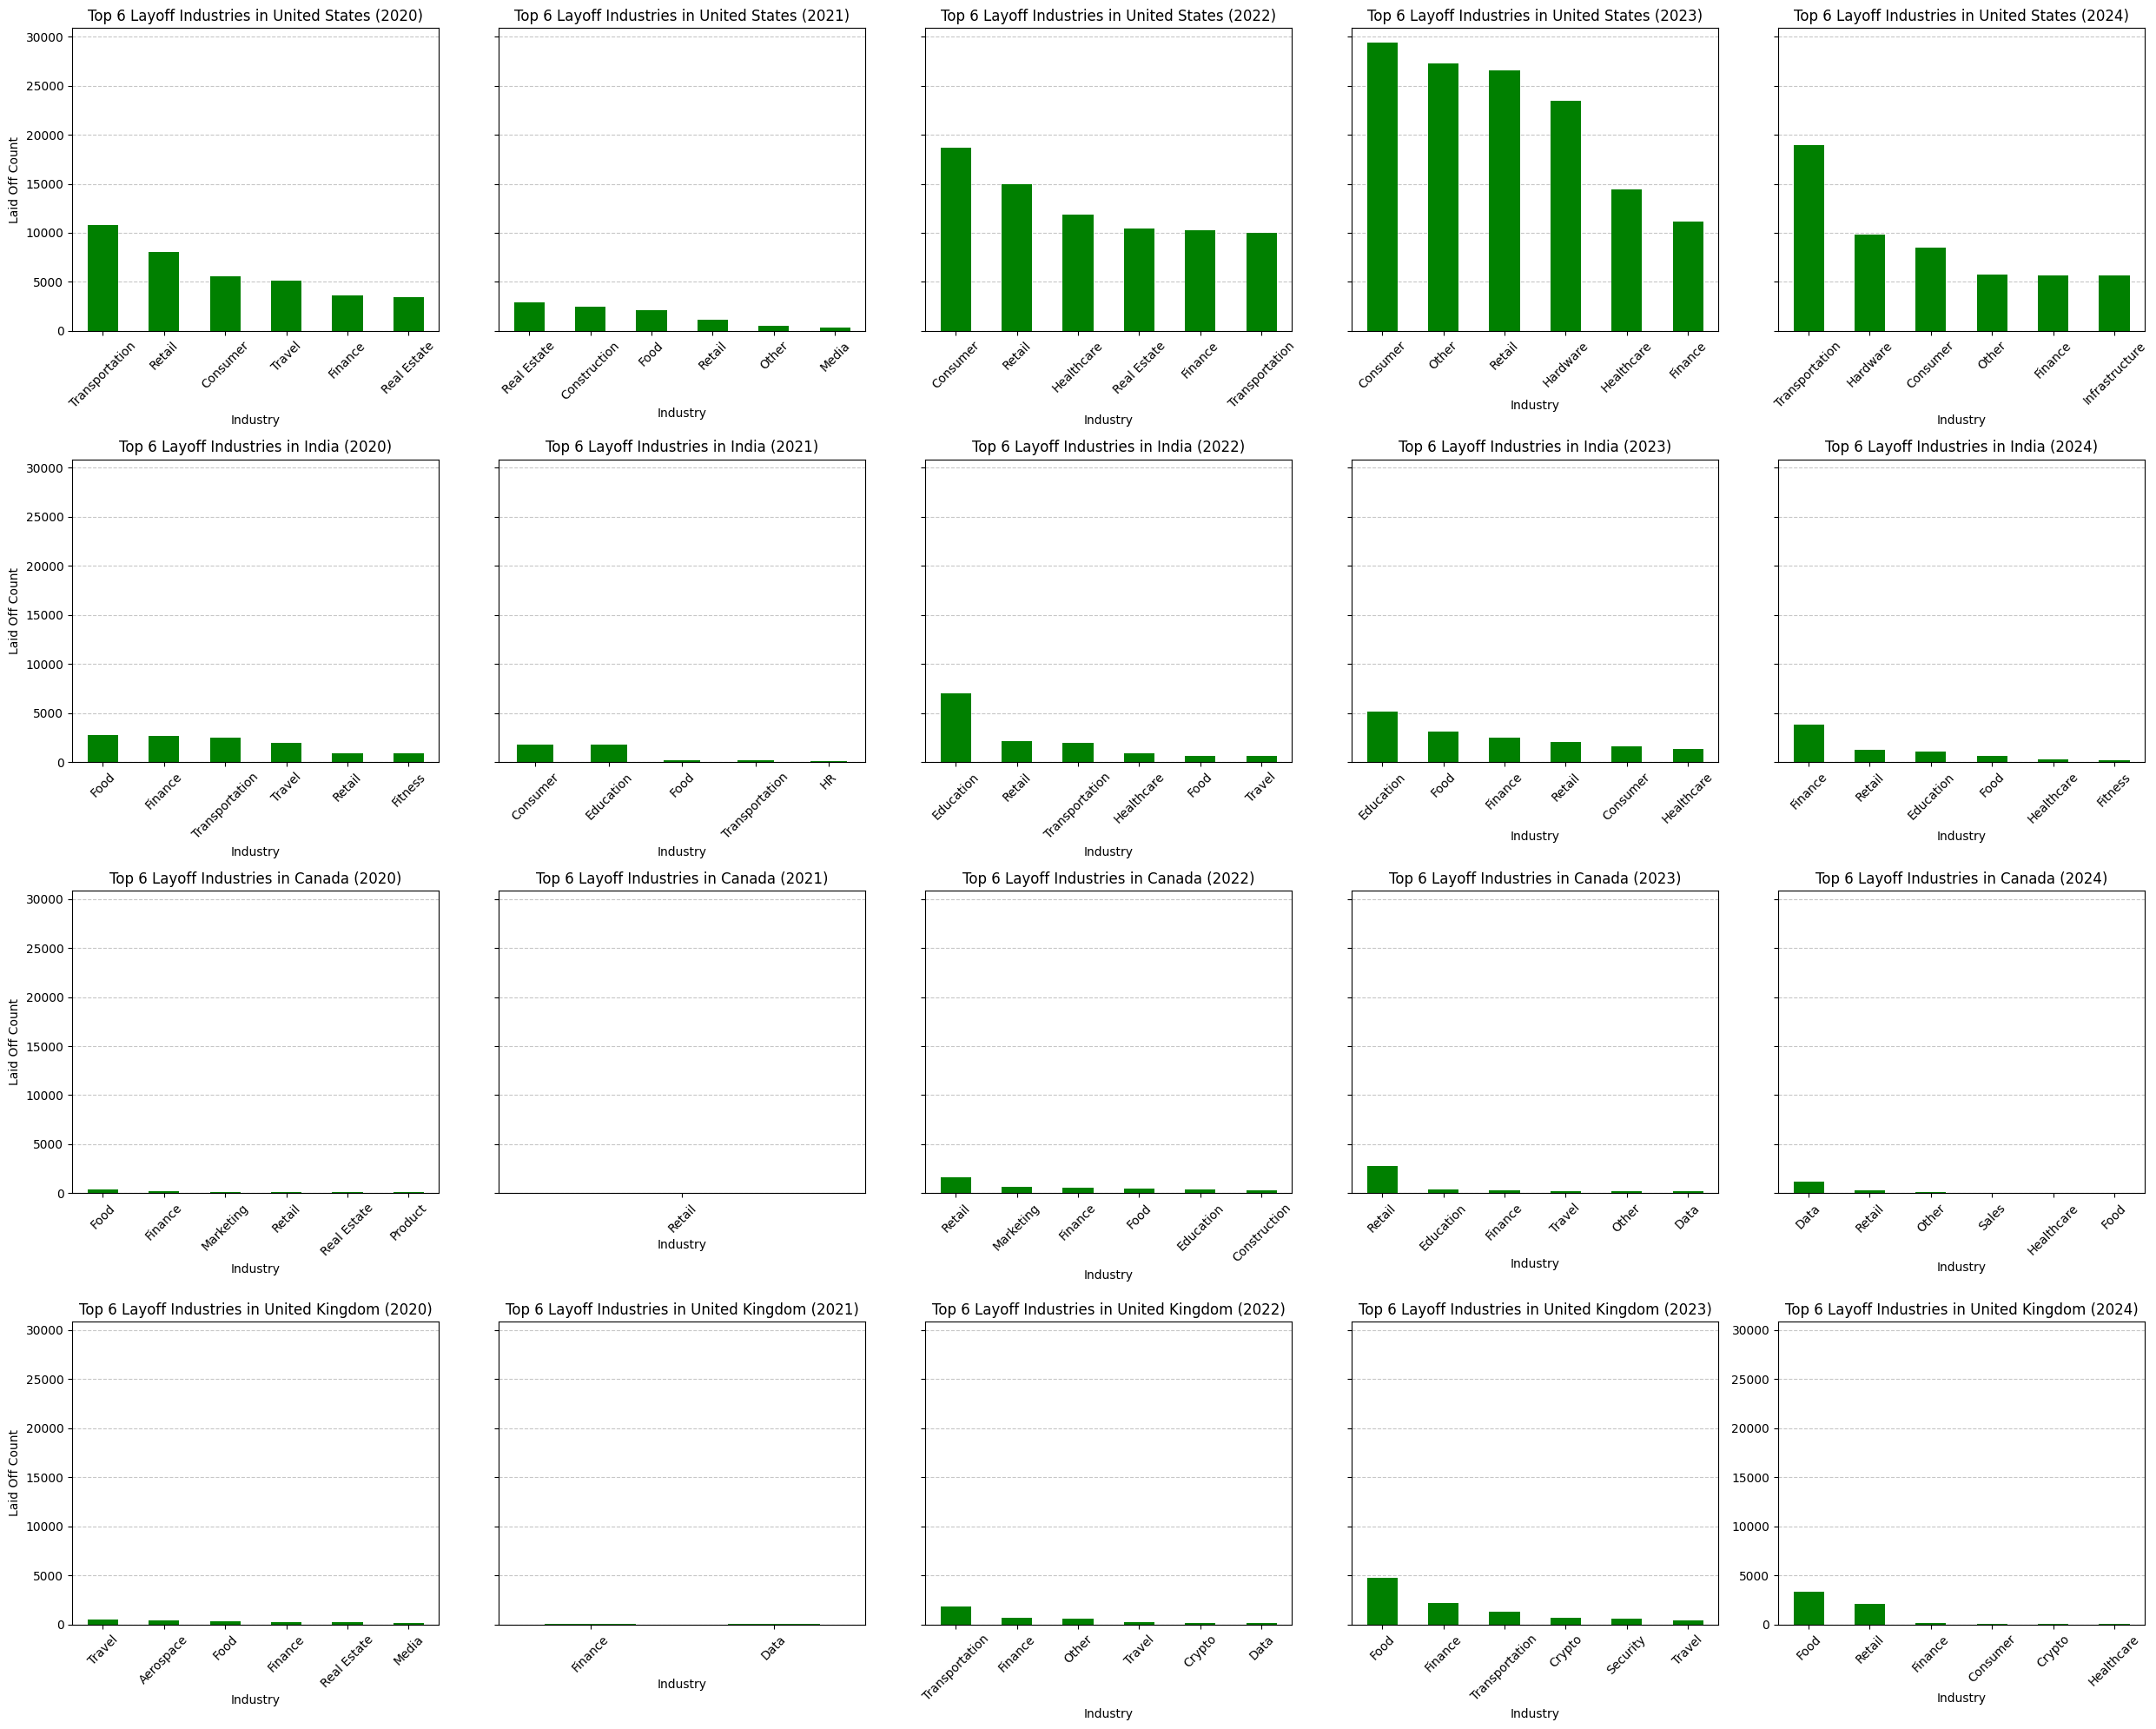

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the years and countries of interest
years = [2020, 2021, 2022, 2023, 2024]
countries = ['United States', 'India', 'Canada', 'United Kingdom']

# Set the number of top industries to consider
top_n = 6

# Create subplots
fig, axes = plt.subplots(len(countries), len(years), figsize=(5 * len(years), 5 * len(countries)), sharey=True)

for i, country in enumerate(countries):
    for j, year in enumerate(years):
        # Filter data for the current country and year
        country_year_data = df_cleaned[(df_cleaned['country'] == country) & (df_cleaned['year'] == year)]

        # Grouping by industry and calculating the total layoffs in each industry for the current country and year
        industry_layoffs = country_year_data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

        # Get the top N industries for the current country and year
        top_industries = industry_layoffs.head(top_n)

        # Plotting the bar graph on the corresponding subplot
        ax = axes[i, j]
        top_industries.plot(kind='bar', ax=ax, color='green')
        ax.set_title(f"Top {top_n} Layoff Industries in {country} ({year})")
        ax.set_xlabel("Industry")
        ax.set_ylabel("Laid Off Count")
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', labelleft=True)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_axisbelow(True)

# Adjust layout
plt.tight_layout()
plt.show()


We can observe that in USA, the Transportation industry saw the most layoffs in 2020, followed by Real Estate in 2021. However, since 2022, the Consumer industry has consistently experienced the highest number of job cuts.

 ## 5. Is there a correlation between the stage of company development and the likelihood of layoffs?

In [33]:
# Get unique stages in the dataset
unique_stages = df_cleaned['stage'].unique()

# Print unique stages
print("Unique Stages in the Dataset:")
for stage in unique_stages:
    print(stage)


Unique Stages in the Dataset:
Unknown
Post-IPO
Series H
Series D
Series E
Acquired
Series B
Series C
Series A
Subsidiary
Series G
Series F
Series J
Seed
Private Equity
Series I


In [34]:
# Create dummy variables for the 'Stage' column
dummy_stages = pd.get_dummies(df_cleaned['stage'], prefix='stage')

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df_cleaned, dummy_stages], axis=1)

# Calculate correlation coefficients between each dummy variable and 'Laid_Off_Count'
correlation_coefficients = {}
for column in dummy_stages.columns:
    correlation_coefficient = np.corrcoef(df_with_dummies[column], df_with_dummies['total_laid_off'])[0, 1]
    correlation_coefficients[column] = correlation_coefficient

# Display correlation coefficients
print("Correlation Coefficients between Dummy Variables for Stage and Laid_Off_Count:")
for stage, coefficient in correlation_coefficients.items():
    print(f"{stage}: {coefficient}")


Correlation Coefficients between Dummy Variables for Stage and Laid_Off_Count:
stage_Acquired: 0.008217040192388137
stage_Post-IPO: 0.19969064946469958
stage_Private Equity: 0.002115396575449044
stage_Seed: -0.03469022423088476
stage_Series A: -0.05238589293874694
stage_Series B: -0.055221338313050906
stage_Series C: -0.05577215041384833
stage_Series D: -0.04391370152878808
stage_Series E: -0.01629278673258171
stage_Series F: -0.011059437403596531
stage_Series G: 0.0023297955802091775
stage_Series H: 0.007219726460662938
stage_Series I: 0.011638175003369784
stage_Series J: 0.01663619544331535
stage_Subsidiary: 0.015577772989325766
stage_Unknown: -0.042511057872743334


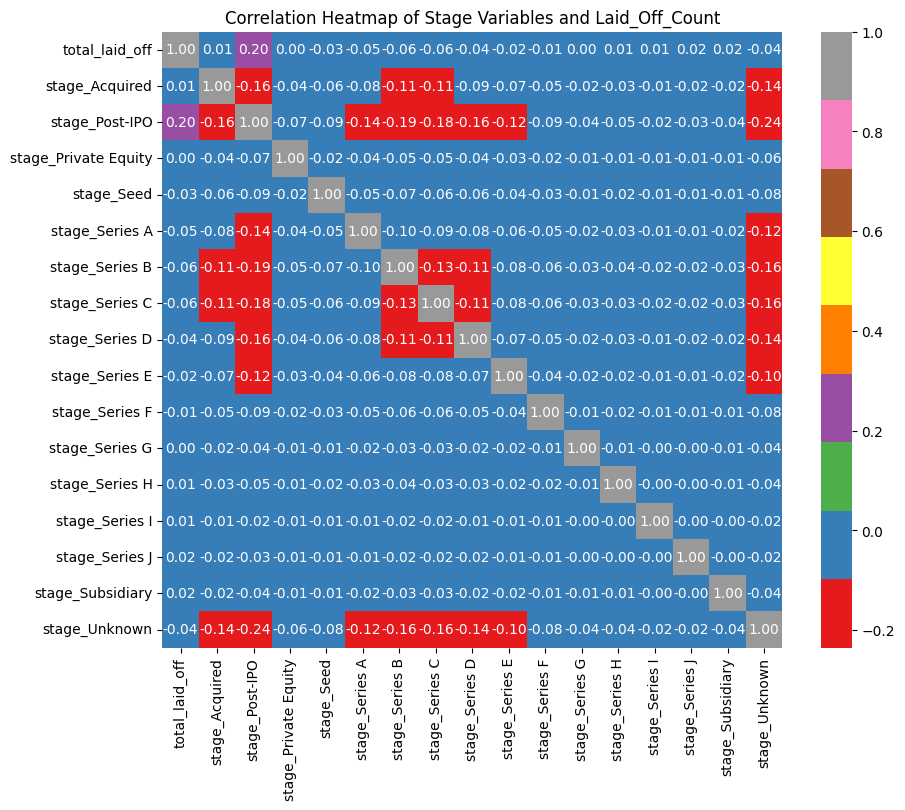

In [35]:
# Calculate the correlation matrix
correlation_matrix = df_with_dummies[['total_laid_off'] + list(dummy_stages.columns)].corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Set1', fmt=".2f", annot_kws={"size": 10})

# Add title
plt.title('Correlation Heatmap of Stage Variables and Laid_Off_Count')

# Show plot
plt.show()


## 6.How does the layoff trend vary over different time periods?

### 6a)Which quarter had the highest and lowest number of layoffs?

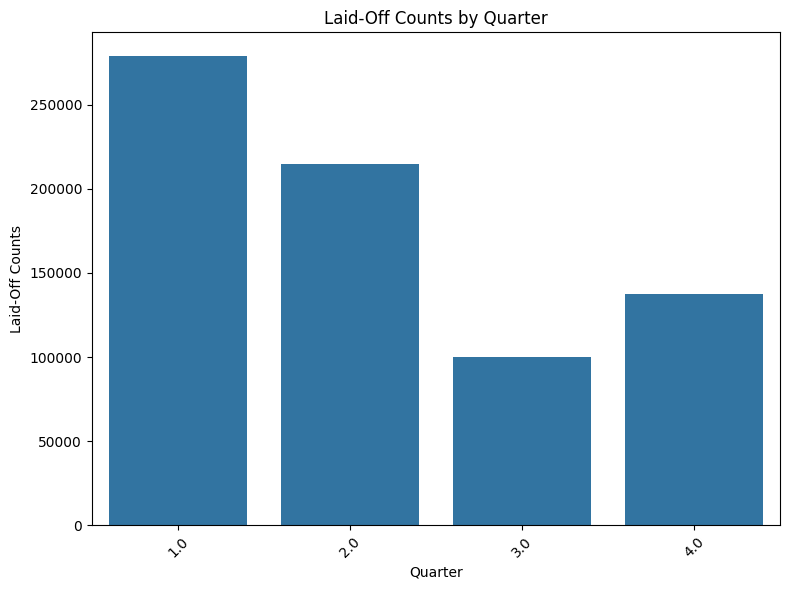

In [36]:
# Group by quarter and sum up laid-off counts
quarterly_layoffs = df_cleaned.groupby('quarter')['total_laid_off'].sum().reset_index()

# Plotting bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='quarter', y='total_laid_off', data=quarterly_layoffs)
plt.xlabel('Quarter')
plt.ylabel('Laid-Off Counts')
plt.title('Laid-Off Counts by Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at the data from 2020 to 2024: The majority of layoffs appear to be concentrated in the first (Q1) and second (Q2) quarters of each year.

### 6b)Which year had the most layoffs?

In [37]:
#find layoffs for each year
df_cleaned.groupby('year')['total_laid_off'].sum()

year
2020.0     93798
2021.0     16863
2022.0    197989
2023.0    306380
2024.0    116250
Name: total_laid_off, dtype: int64

2023 saw the most layoffs compared to 2020, 2021, and 2022.

### 6c) What insights can be drawn from analyzing the layoff trend across different years and examining the monthly layoff counts for each year individually?

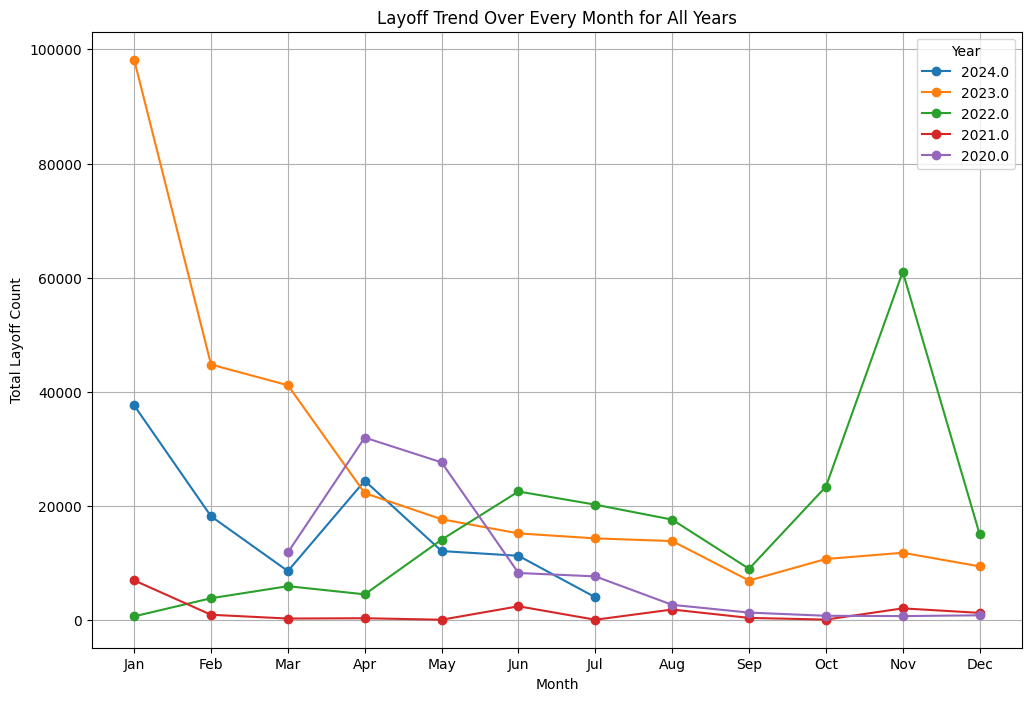

In [38]:
# Group data by year and month and sum the layoff counts for each month across all years
monthly_layoffs_by_year = df_cleaned.groupby(['year', 'month'])['total_laid_off'].sum()

# Extract unique years
years = df_cleaned['year'].unique()

# Plot the data for each year
plt.figure(figsize=(12, 8))
for year in years:
    monthly_layoffs = monthly_layoffs_by_year[year]
    plt.plot(monthly_layoffs.index, monthly_layoffs.values, marker='o', label=str(year))

# Add labels and title
plt.title('Layoff Trend Over Every Month for All Years')
plt.xlabel('Month')
plt.ylabel('Total Layoff Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

Layoff Peaks (Oct 2022 to Mar 2023):

- Economic Downturn: Companies likely experienced a downturn in the economy, resulting in decreased consumer demand and reduced revenue. To maintain profitability, many firms had to downsize their workforce.

- Strategic Restructuring: This period may have seen companies undergoing strategic restructuring, such as mergers, acquisitions, or shifts in business priorities. These changes often necessitate layoffs to realign resources and streamline operations.

Trends by Year:
- 2023: The year began with the highest number of layoffs, which gradually decreased throughout the year. This could indicate initial reactions to economic challenges or strategic changes, with stabilization efforts reducing the need for further layoffs as the year progressed.
- 2022: Layoffs started at lower levels but increased over the course of the year. This pattern might reflect an escalating economic crisis or progressive implementation of restructuring plans.


## 7.What is the distribution of layoffs across different days of the week, and which day experiences the highest occurrence of layoffs?

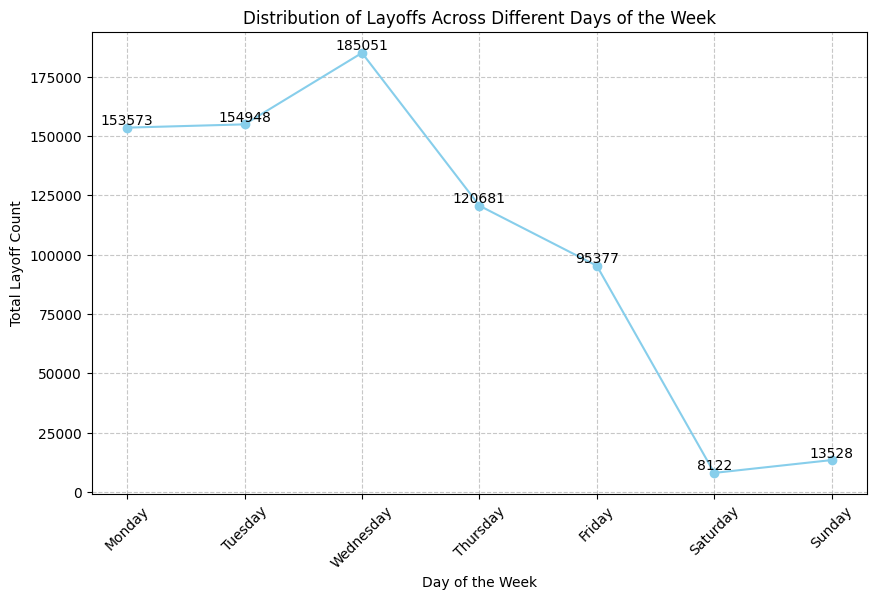

In [39]:
# Combine 'year', 'month', and 'day' columns to create a datetime column
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Extract the day of the week (Monday=0, Sunday=6) from the 'date' column
df_cleaned['day_of_week'] = df_cleaned['date'].dt.dayofweek

# Group by the day of the week and sum the layoff counts
layoffs_by_day = df_cleaned.groupby('day_of_week')['total_laid_off'].sum()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the distribution of layoffs across different days of the week
plt.figure(figsize=(10, 6))
plt.plot(day_names, layoffs_by_day, marker='o', color='skyblue', linestyle='-')
plt.title('Distribution of Layoffs Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Layoff Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate each point with the corresponding layoff count
for i, count in enumerate(layoffs_by_day):
    plt.text(day_names[i], count, str(count), ha='center', va='bottom')

plt.show()


Wednesday is the day with the highest occurrence of layoffs in a week.

## 8. Identifying the ten companies with the highest number of layoffs.

In [40]:
#layoff by company
df_cleaned.groupby('company')['total_laid_off'].sum().nlargest(15)

company
Amazon        28160
Meta          21160
Tesla         14580
Microsoft     14218
Google        13872
Dell          12730
SAP           11000
Salesforce    10840
Philips       10000
Cisco          8700
Ericsson       8500
Flink          8100
Uber           7785
Micron         7200
Getir          6060
Name: total_laid_off, dtype: int64

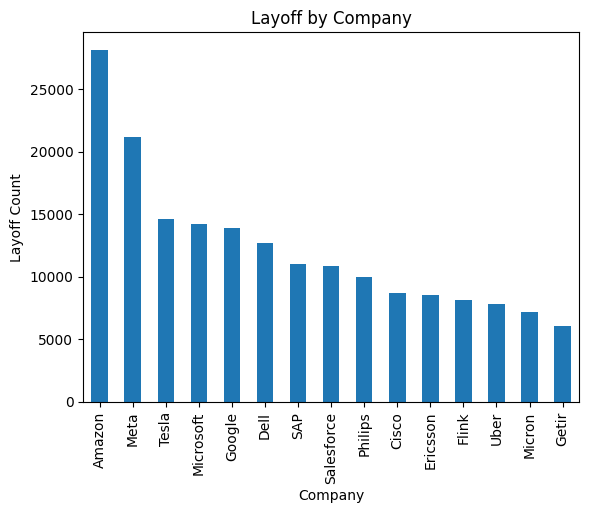

In [41]:
#plotting it with bar chart
df_cleaned.groupby('company')['total_laid_off'].sum().nlargest(15).plot(kind='bar')
plt.title('Layoff by Company')
plt.xlabel('Company')
plt.ylabel('Layoff Count');

### 8a) Identify the top 5 companies with the highest layoff counts for each year from 2020 to 2024.

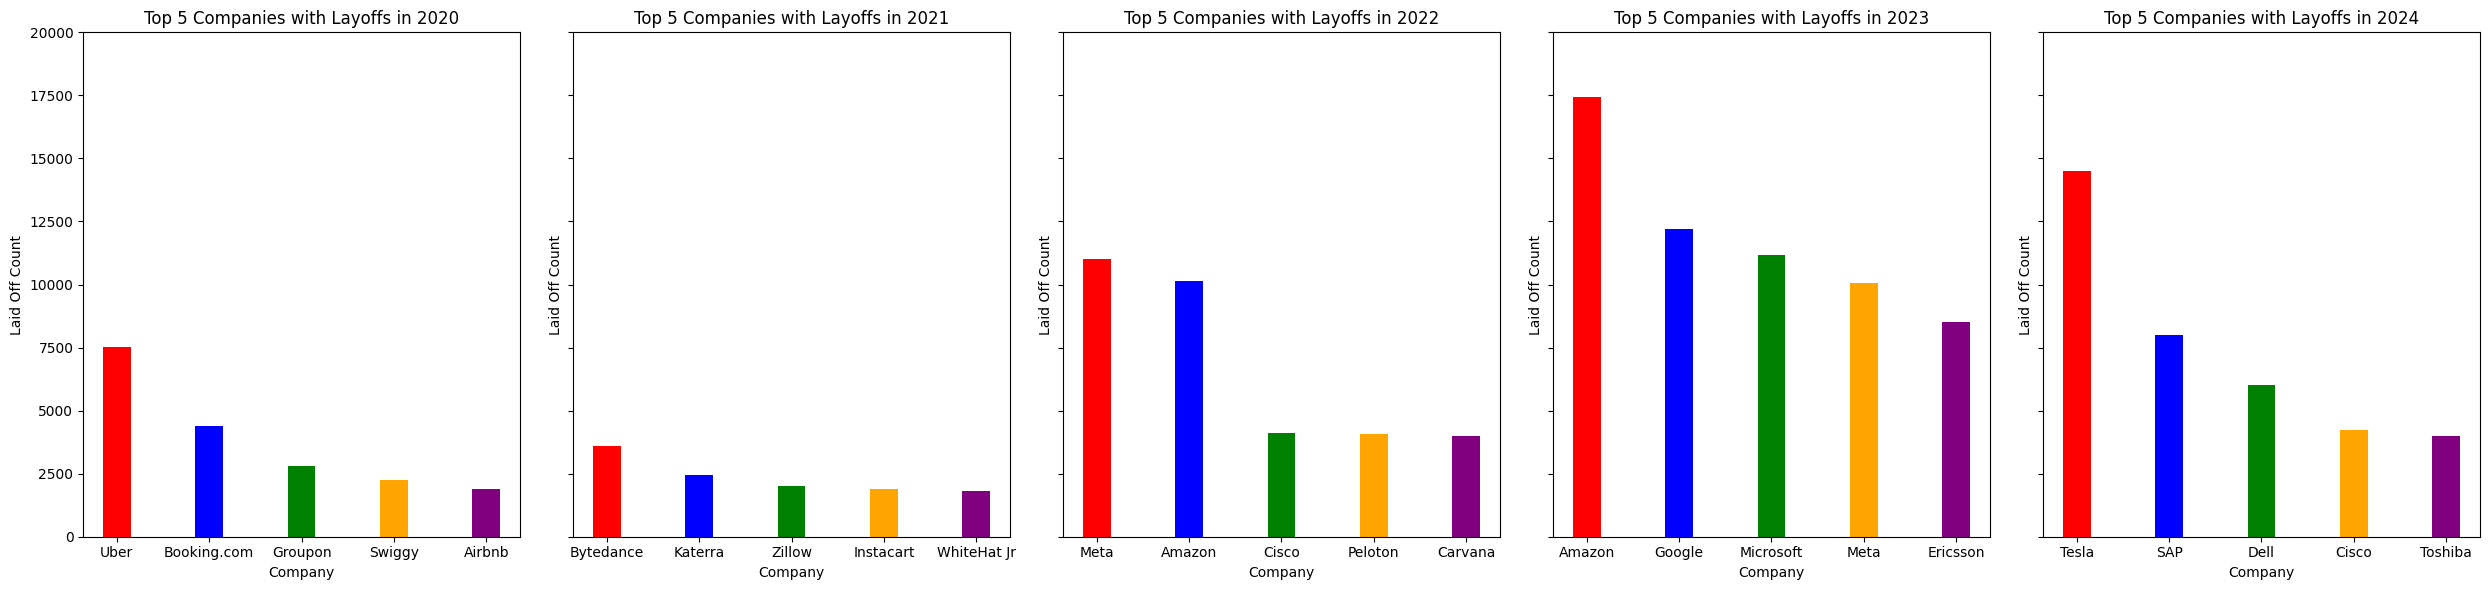

In [43]:
# Define years and top_n
years = [2020, 2021, 2022, 2023, 2024]
top_n = 5

# Create subplots
fig, axes = plt.subplots(1, len(years), figsize=(5*len(years), 6), sharey=True)

# Define colors for the top 5 companies
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Initialize y-axis limit
y_max = 20000

for i, year in enumerate(years):
    # Filter data for the current year
    year_data = df_cleaned[df_cleaned['year'] == year]

    # Group data by company and sum the layoff counts for the current year
    layoffs_by_company = year_data.groupby('company')['total_laid_off'].sum()

    # Sort companies based on total layoff counts and select the top N companies
    top_companies = layoffs_by_company.nlargest(top_n)

    # Initialize the width for each bar group
    bar_width = 0.3

    # Calculate the x positions for the bars
    x = np.arange(len(top_companies))

    # Create bars for each company with specified colors
    for j, (company, layoffs) in enumerate(top_companies.items()):
        axes[i].bar(x[j], layoffs, bar_width, label=company, color=colors[j])

    # Update y-axis limit if necessary
    y_max = max(y_max, top_companies.max())

    # Set the labels and title for each subplot
    axes[i].set_xlabel('Company')
    axes[i].set_title(f'Top 5 Companies with Layoffs in {year}')

    # Set the x-axis tick labels for each subplot
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(top_companies.index)

# Set y-axis limit for all subplots
for ax in axes:
    ax.set_ylim(0, y_max)
    ax.set_ylabel('Laid Off Count')

plt.tight_layout()
plt.show()


2020:
- Uber had the highest layoffs among the top 3 companies, likely due to the impact of the COVID-19 pandemic on the ride-sharing industry and the need to cut costs.
- Booking.com, an online travel company, was also heavily affected by the pandemic's toll on the travel sector, leading to significant workforce reductions.

2021:
- ByteDance, the parent company of TikTok,might possibly be reflecting restructuring efforts or strategic shifts within the company.
- Kanzhun (Company), a Chinese online recruitment platform, also had major layoffs, potentially due to changes in the job market or industry dynamics.

2022:
- Meta (Facebook) had the highest layoffs, likely driven by its strategic pivot towards the metaverse and efforts to streamline operations amid competition and market changes.
- Amazon(As an e-commerce and cloud computing giant), may be undergoing workforce optimization and cost-cutting measures to maintain profitability and competitiveness, especially in the face of changing consumer behavior and market conditions.

2023:
- Amazon again tops the list, may be indicating sustained efforts to optimize its workforce or market conditions.
- Google - Google's layoffs could be driven by a need to streamline operations, realign its workforce with strategic priorities (such as AI and cloud computing), and adapt to evolving technological landscapes and competitive pressures.
- Microsoft - Similar to Google, Microsoft's layoffs may be aimed at restructuring the company's workforce to align with strategic shifts, such as a greater focus on cloud services, artificial intelligence, and emerging technologies.

2024 (projected):
- Tesla - Tesla had the highest number of layoffs due to change in the company restructure.
- SAP - SAP's projected layoffs could be related to consolidating its product offerings, adapting to changing customer demands, or responding to competition from cloud-based solutions and other disruptive technologies.


## 9. Identifying Top 15 Location_HQ with highest layoffs?

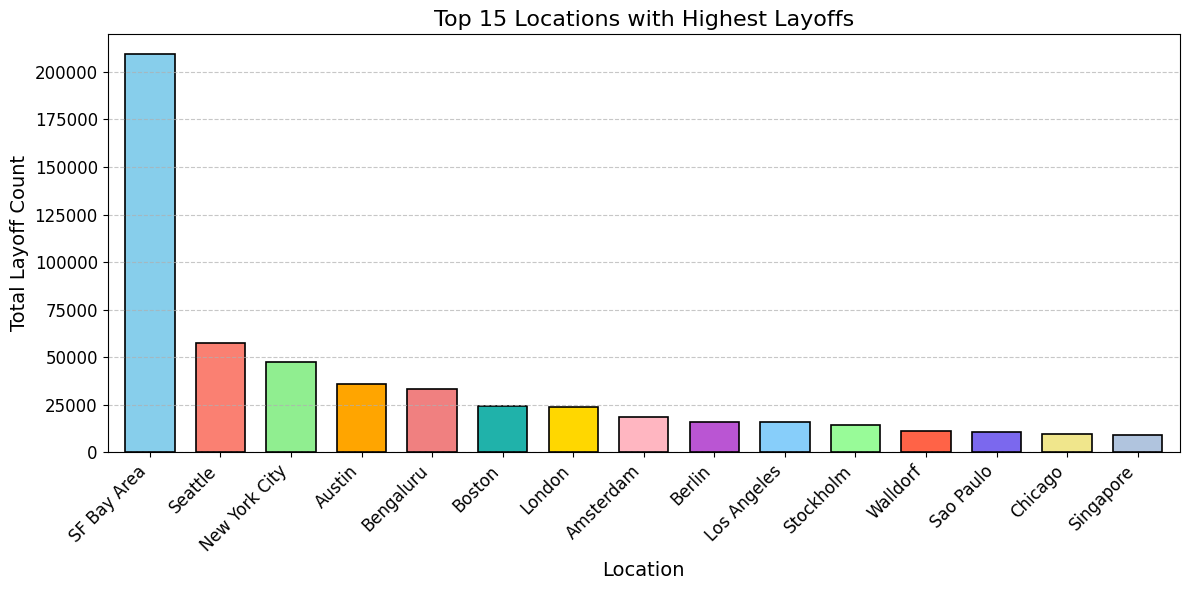

In [44]:
# Define custom colors
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'lightseagreen',
          'gold', 'lightpink', 'mediumorchid', 'lightskyblue', 'palegreen', 'tomato',
          'mediumslateblue', 'khaki', 'lightsteelblue']

# Group data by location and sum the layoff counts
top_locations = df_cleaned.groupby('location')['total_laid_off'].sum().nlargest(15)

# Create a bar plot with custom colors and additional customizations
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color=colors, width=0.7, edgecolor='black', linewidth=1.2)
plt.title('Top 15 Locations with Highest Layoffs', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Layoff Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 10.How does the company's stage of development (e.g., early-stage, growth-stage) relate to the layoff count?

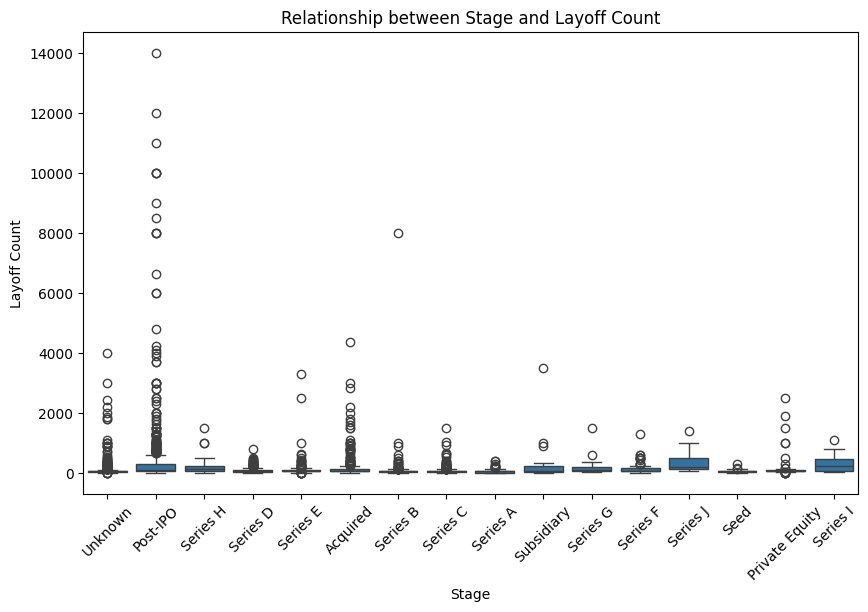

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stage', y='total_laid_off', data=df_cleaned)
plt.title('Relationship between Stage and Layoff Count')
plt.xlabel('Stage')
plt.ylabel('Layoff Count')
plt.xticks(rotation=45)
plt.show()

## 11.Is there a correlation between the percentage of layoffs and the amount of funds raised by the company?

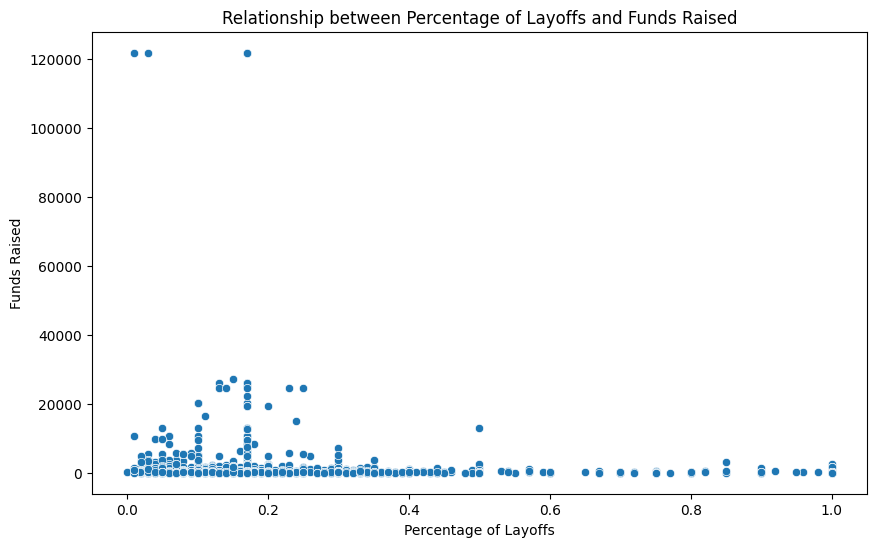

In [46]:
# Visualize the relationship between percentage laid off and funds raised
plt.figure(figsize=(10, 6))
sns.scatterplot(x='percentage_laid_off', y='funds_raised', data=df_cleaned)
plt.title('Relationship between Percentage of Layoffs and Funds Raised')
plt.xlabel('Percentage of Layoffs')
plt.ylabel('Funds Raised')
plt.show()


### 11a)Funds raised vs Number of Layoffs

In [47]:
# Scatter plot for funds raised vs number of layoffs
fig2 = px.scatter(df_cleaned,
                  x='total_laid_off',
                  y='funds_raised',
                  title='Funds Raised vs. Number of Layoffs',
                  labels={'total_laid_off': 'Number of Layoffs', 'funds_raised': 'Funds Raised ($)'},
                  color='total_laid_off',
                  color_continuous_scale=px.colors.sequential.RdBu,
                  hover_name='company')

fig2.show()


## 12.Are there any outliers in the Layoff Count?

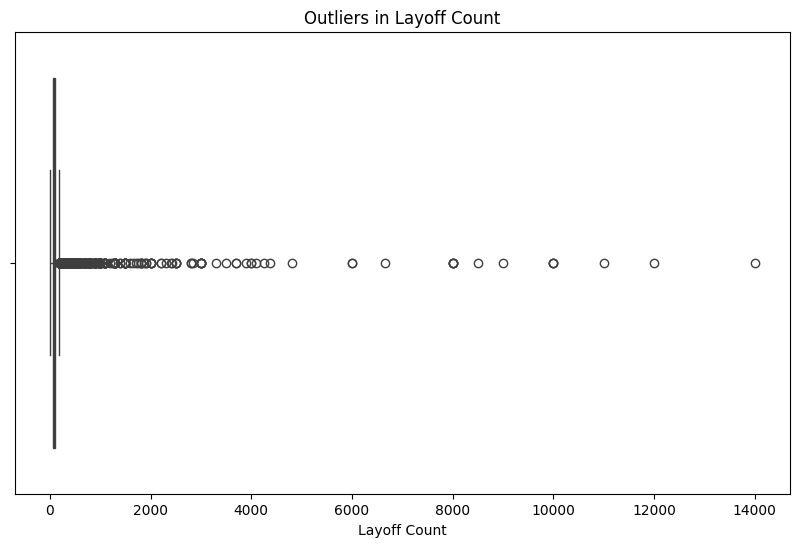

In [48]:
# Detect and visualize outliers in layoff count
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['total_laid_off'])
plt.title('Outliers in Layoff Count')
plt.xlabel('Layoff Count')
plt.show()


## 13. How do different stages of company development compare in terms of layoff counts, percentage of layoffs, and funds raised?

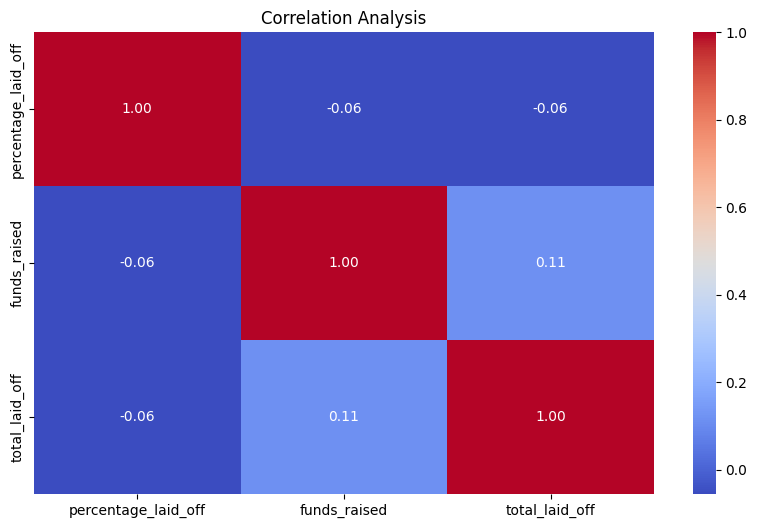

In [49]:
# Conduct correlation analysis
correlation_matrix = df_cleaned[['percentage_laid_off', 'funds_raised', 'total_laid_off']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis')
plt.show()


## 14.Which country had the highest layoffs?

In [50]:
#layoff for each country
df_cleaned.groupby('country')['total_laid_off'].sum().sort_values(ascending=False)

country
United States     489667
India              59379
Germany            28793
United Kingdom     24249
Netherlands        19085
                   ...  
Bahrain               80
Italy                 80
Peru                  80
Thailand              55
Ukraine               50
Name: total_laid_off, Length: 63, dtype: int64

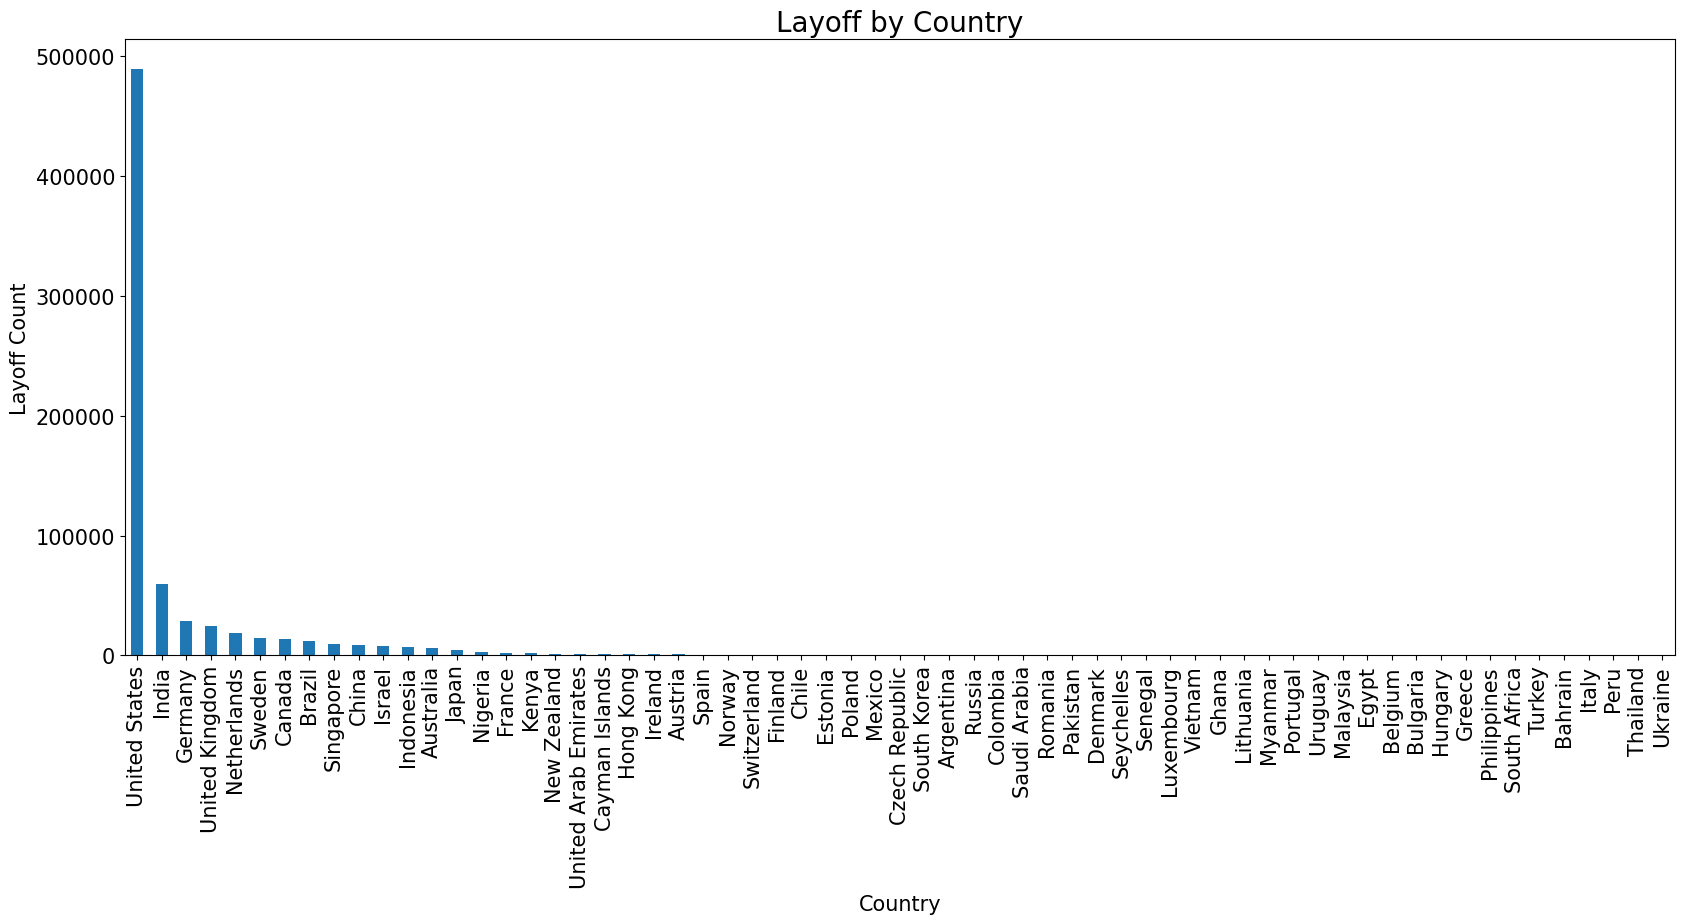

In [51]:
#plotting it with bar chart
df_cleaned.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8),fontsize=15)
plt.title('Layoff by Country',size=20)
plt.xlabel('Country',size=15)
plt.ylabel('Layoff Count',size=15);


## 15. Let's do more analysis on 'United States' country

In [52]:
# Filtering the dataset for entries related to United States
US_df = df_cleaned[df_cleaned['country'] == 'United States']

# Displaying the first few rows of the US-specific data
US_df.head()

company     location     industry  total_laid_off  \
0            UKG       Boston           HR            2200   
5   Upside Foods  SF Bay Area         Food              26   
9      Priceline      Norwalk       Travel             103   
10      RealPage       Dallas  Real Estate             260   
11        Planet  SF Bay Area    Aerospace             180   

    percentage_laid_off     stage        country  funds_raised    year  month  \
0                  0.14   Unknown  United States         167.0  2024.0    7.0   
5                  0.17   Unknown  United States         598.0  2024.0    7.0   
9                  0.17  Acquired  United States          77.0  2024.0    6.0   
10                 0.04  Acquired  United States         105.0  2024.0    6.0   
11                 0.17  Post-IPO  United States         574.0  2024.0    6.0   

     day  quarter       date  day_of_week  
0    3.0      3.0 2024-07-03            2  
5    1.0      3.0 2024-07-01            0  
9   28.0      2.0 2024-06-28            4  
10  27.0      2.0 2024-06-27            3  
11  26.0      2.0 2024-06-26            2

In [53]:
US_df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'stage', 'country', 'funds_raised', 'year',
       'month', 'day', 'quarter', 'date', 'day_of_week'],
      dtype='object')

In [54]:
# Number of unique companies in the United States that had layoffs
num_companies = US_df['company'].nunique()
print("Total number of companies in the United States:", num_companies)

# Total layoffs in the United States
total_layoffs = US_df['total_laid_off'].sum()
print("Total count of layoffs in the US:", total_layoffs)

# Layoffs in each year
# Determine unique years
unique_years = US_df['year'].unique()

# Iterate over each unique year
for year in unique_years:
    # Filter dataset for each year
    year_data = US_df[US_df['year'] == year]

    # Calculate total layoffs for the year
    total_layoffs_year = year_data['total_laid_off'].sum()
    print(f"Total layoffs in {year}: {total_layoffs_year}")

# Average funds raised by companies in the United States
avg_funds_raised = US_df['funds_raised'].mean()
print("Average funds raised by companies in the United States:", avg_funds_raised)

# Total funds raised by companies in the United States
total_funds_raised = US_df['funds_raised'].sum()
print("Total funds raised by companies in the United States:", total_funds_raised)


Total number of companies in the United States: 1657
Total count of layoffs in the US: 489667
Total layoffs in 2024.0: 79156
Total layoffs in 2023.0: 208601
Total layoffs in 2022.0: 131335
Total layoffs in 2021.0: 10430
Total layoffs in 2020.0: 60145
Average funds raised by companies in the United States: 793.9670843776107
Total funds raised by companies in the United States: 1900757.2


## How do layoffs in the United States vary between different sectors or sub-industries?

In [55]:
# Top industries in United States affected by layoffs
top_industries = US_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

top_industries.head(10)

industry
Consumer          62240
Retail            54687
Transportation    47195
Other             38859
Hardware          37090
Finance           30940
Healthcare        30540
Real Estate       20721
Food              17607
Infrastructure    16904
Name: total_laid_off, dtype: int64

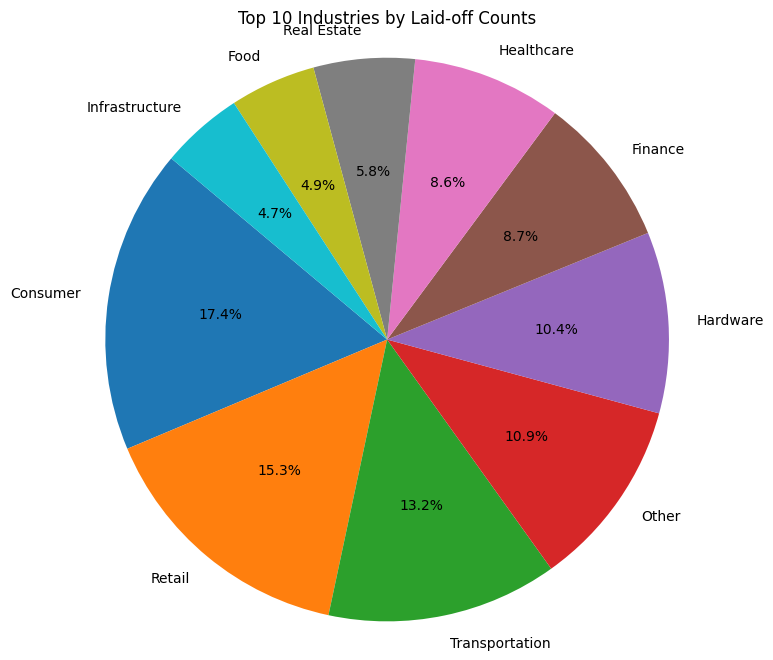

In [56]:
# Selecting top 10 industries
top_industries = top_industries.head(10)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Industries by Laid-off Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [57]:
#Top 10 companies in United States that laid off
top_companies = US_df.groupby('company')["total_laid_off"].sum().sort_values(ascending=False)
top_companies.head(20)

company
Amazon        28160
Meta          21160
Tesla         14580
Microsoft     14218
Google        13872
Dell          12730
Salesforce    10790
Cisco          8700
Micron         7200
Uber           6900
PayPal         4583
Peloton        4495
Wayfair        4270
Better.com     4220
Carvana        4080
IBM            4060
Twitter        4020
Groupon        3800
Seagate        3480
Indeed         3200
Name: total_laid_off, dtype: int64

## Are there any differences in the characteristics of layoffs (e.g., size, frequency) between startups and established companies in the United States?

In [58]:
# Distribution of layoffs across different stages of companies in United States
company_stages_distribution = US_df.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False)

company_stages_distribution

stage
Post-IPO          295792
Acquired           44286
Unknown            39304
Series C           21054
Series B           19540
Series D           19392
Series E           14002
Series F           10140
Series A            7623
Series H            5767
Private Equity      5139
Seed                3079
Series G            2215
Subsidiary          2059
Series I             275
Name: total_laid_off, dtype: int64

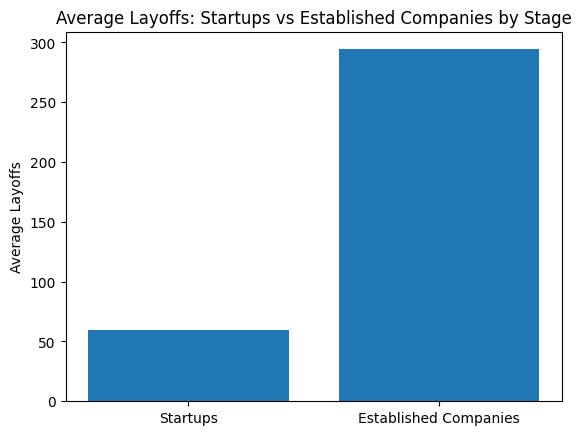

In [59]:
# Define criteria based on the provided stages to differentiate between startups and established companies
# Consider companies in "Seed" or "Series A" stage as startups
# and companies in "Series D" or beyond as established

startup_criteria = (US_df['stage'] == 'Seed') | (US_df['stage'] == 'Series A')
startup_df = US_df[startup_criteria]

established_criteria = (US_df['stage'] == 'Series D') | (US_df['stage'] == 'Series E') | \
                       (US_df['stage'] == 'Series F') | (US_df['stage'] == 'Series G') | \
                       (US_df['stage'] == 'Series H') | (US_df['stage'] == 'Series I') | \
                       (US_df['stage'] == 'Series J') | (US_df['stage'] == 'Post-IPO') | \
                       (US_df['stage'] == 'Acquired') | (US_df['stage'] == 'Private Equity')
established_df = US_df[established_criteria]

# Calculate average size of layoffs for startups and established companies
startup_avg_layoffs = startup_df['total_laid_off'].mean()
established_avg_layoffs = established_df['total_laid_off'].mean()

# Plotting
plt.bar(['Startups', 'Established Companies'], [startup_avg_layoffs, established_avg_layoffs])
plt.title('Average Layoffs: Startups vs Established Companies by Stage')
plt.ylabel('Average Layoffs')
plt.show()


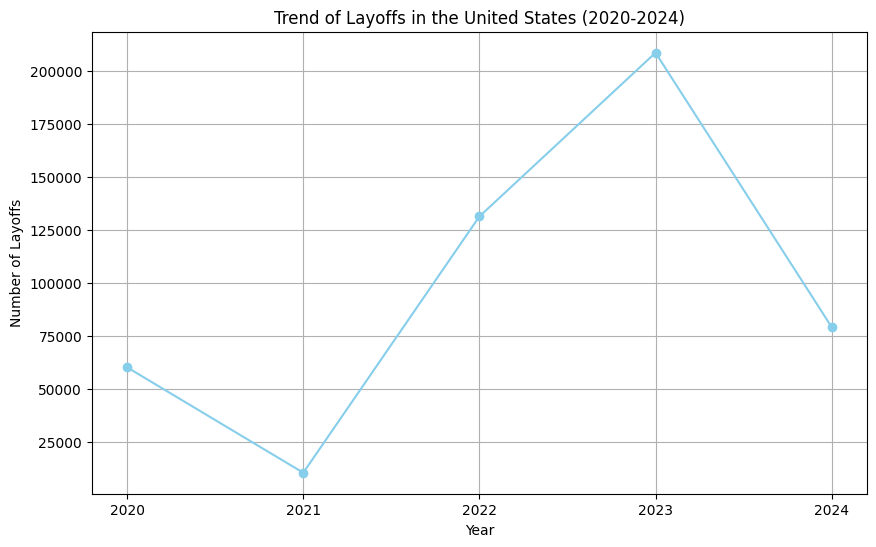

In [60]:
# Filter data for years between 2020 and 2024
US_layoffs_trend = US_df[(US_df['year'] >= 2020) & (US_df['year'] <= 2024)]

# Group filtered data by year and sum the layoff counts
US_layoffs_trend = US_layoffs_trend.groupby('year')['total_laid_off'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(US_layoffs_trend['year'], US_layoffs_trend['total_laid_off'], marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Layoffs in the United States (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Layoffs')
plt.grid(True)
plt.xticks(range(2020, 2025))  # Ensure x-axis ticks include all years from 2020 to 2024
plt.show()


In [62]:
# First, determine the top companies with the highest layoffs
top_n = 5
top_companies_layoffs = US_df.groupby('company')['total_laid_off'].sum().nlargest(top_n).reset_index()

# Funds raised by the top companies with the highest layoffs
top_companies_funds = US_df[US_df['company'].isin(top_companies_layoffs['company'])][['company', 'funds_raised']]
top_companies_funds = top_companies_funds.drop_duplicates().sort_values(by='funds_raised', ascending=False)

top_companies_funds


company  funds_raised
188       Meta       26000.0
104      Tesla       20200.0
151     Amazon         108.0
55      Google          26.0
53   Microsoft           1.0

Funds raised is in millions.

In [63]:
# Distribution of layoffs across different company stages in the US
stage_avg_layoffs = US_df.groupby('stage')['total_laid_off'].mean().sort_values(ascending=False)
stage_median_layoffs = US_df.groupby('stage')['total_laid_off'].median().sort_values(ascending=False)

stage_layoffs_analysis = pd.DataFrame({
    'Average Layoffs': stage_avg_layoffs,
    'Median Layoffs': stage_median_layoffs
}).reset_index()

stage_layoffs_analysis


stage  Average Layoffs  Median Layoffs
0         Acquired       194.236842            80.0
1         Post-IPO       474.025641           100.0
2   Private Equity       125.341463            80.0
3             Seed        61.580000            80.0
4         Series A        58.638462            80.0
5         Series B        72.370370            80.0
6         Series C        78.559701            80.0
7         Series D        91.471698            80.0
8         Series E       116.683333            80.0
9         Series F       128.354430            80.0
10        Series G       130.294118            80.0
11        Series H       230.680000           100.0
12        Series I        91.666667            80.0
13      Subsidiary       171.583333            80.0
14         Unknown       124.774603            80.0

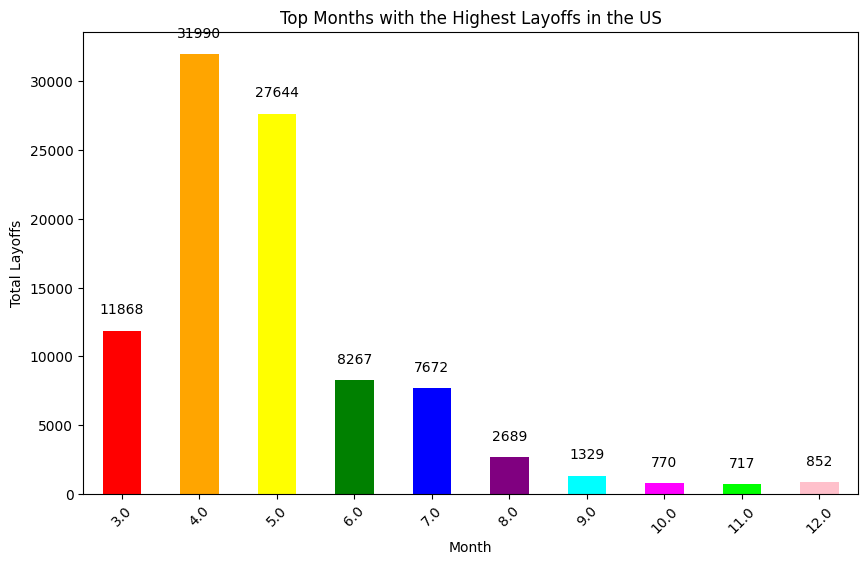

In [64]:
# Define colors for the bar graph
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'cyan', 'magenta', 'lime', 'pink']

# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_layoffs.plot(kind='bar', color=colors)
plt.title('Top Months with the Highest Layoffs in the US')
plt.xlabel('Month')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.yticks(range(0, monthly_layoffs.max() + 1000, 5000))
for i, value in enumerate(monthly_layoffs):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [65]:
# Companies in the US with high funds raised and significant layoffs
top_funded_companies_with_layoffs = US_df.sort_values(by=['funds_raised', 'total_laid_off'], ascending=[False, False]).head(10)

top_funded_companies_with_layoffs[['company', 'funds_raised', 'total_laid_off', 'industry', 'stage', 'year']]


company  funds_raised  total_laid_off        industry     stage    year
2727  Netflix      121900.0             300           Media  Post-IPO  2022.0
2916  Netflix      121900.0             150           Media  Post-IPO  2022.0
2306  Netflix      121900.0              30           Media  Post-IPO  2022.0
2952  Netflix      121900.0              25           Media  Post-IPO  2022.0
396     Xerox       27200.0            3000        Hardware  Post-IPO  2024.0
2078     Meta       26000.0           11000        Consumer  Post-IPO  2022.0
1269     Meta       26000.0           10000        Consumer  Post-IPO  2023.0
188      Meta       26000.0              80        Consumer  Post-IPO  2024.0
603      Meta       26000.0              80        Consumer  Post-IPO  2023.0
924      Uber       25200.0             200  Transportation  Post-IPO  2023.0

## 1.What is the distribution of layoffs across different Head Quaters in the United States, and which states constitute the top 10 in terms of the highest total layoffs?

In [66]:
# Find the number of unique headquarters
num_headquarters = US_df['location'].nunique()

print(f"The number of headquarters in the dataset is: {num_headquarters}")


The number of headquarters in the dataset is: 110


In [67]:
# Grouping data by 'location' and summing up 'total_laid_off' within each location
location_layoffs = US_df.groupby('location')['total_laid_off'].sum()

# Sorting the locations by total layoffs and selecting the top 15
top_15_locations_layoffs = location_layoffs.sort_values(ascending=False).head(15)

print("Locations with the highest total layoffs:")
print(top_15_locations_layoffs)


Locations with the highest total layoffs:
location
SF Bay Area        209139
Seattle             57642
New York City       47437
Austin              35728
Boston              24391
Los Angeles         15753
Chicago              9415
Boise                7515
San Diego            6660
Phoenix              6241
Miami                4740
Portland             4007
Philadelphia         3906
Washington D.C.      3755
Salt Lake City       3628
Name: total_laid_off, dtype: int64


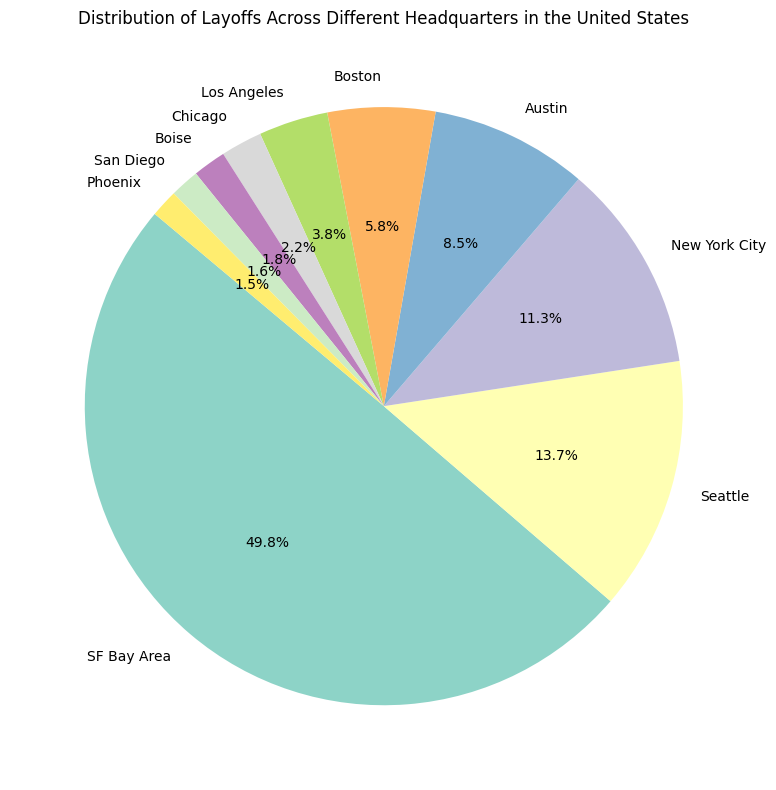

In [68]:
# Grouping data by 'location' and summing up 'total_laid_off' within each location
state_layoffs = US_df.groupby('location')['total_laid_off'].sum()

# Sorting the locations by total layoffs and selecting the top 10
state_layoffs_sorted = state_layoffs.sort_values(ascending=False).head(10)

# Plotting the distribution of layoffs across different headquarters as a pie chart
plt.figure(figsize=(8, 8))
state_layoffs_sorted.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribution of Layoffs Across Different Headquarters in the United States')
plt.ylabel('')  # Removing the y-label
plt.tight_layout()
plt.show()


## 2.Are there any notable trends or patterns in the timing of layoffs within top 4 industries in the United States?

<ipython-input-70-c3909fac73d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-c3909fac73d3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



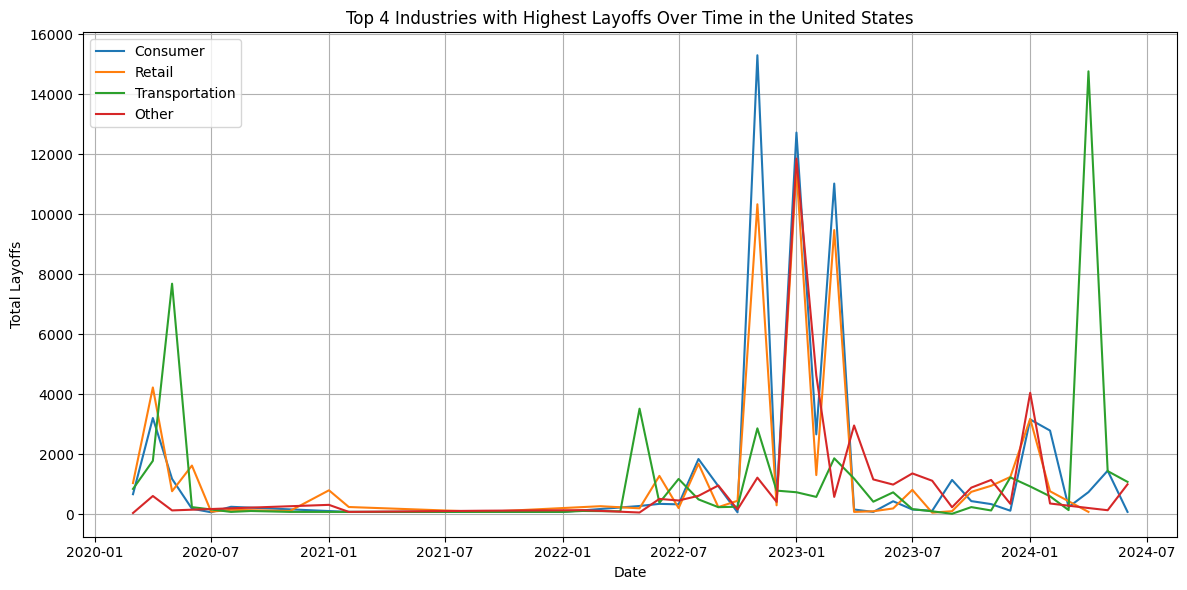

In [70]:
# Convert 'year' and 'month' columns to integers (if not already)
US_df['year'] = US_df['year'].astype(int)
US_df['month'] = US_df['month'].astype(int)

# Handle invalid month values (e.g., months greater than 12)
US_df = US_df[(US_df['month'] >= 1) & (US_df['month'] <= 12)]

# Convert 'year' and 'month' columns to datetime format
US_df['Date'] = pd.to_datetime(US_df['year'].astype(str) + '-' + US_df['month'].astype(str), format='%Y-%m')

# Find the top 4 industries with the highest total layoffs
top_4_industries = US_df.groupby('industry')['total_laid_off'].sum().nlargest(4).index

# Plotting top 4 industries
plt.figure(figsize=(12, 6))
for industry in top_4_industries:
    industry_layoffs_over_time = US_df[US_df['industry'] == industry].groupby('Date')['total_laid_off'].sum()
    plt.plot(industry_layoffs_over_time.index, industry_layoffs_over_time.values, label=industry)

plt.title('Top 4 Industries with Highest Layoffs Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Are there any specific months or quarters within the year that tend to have higher layoff activity in the United States?

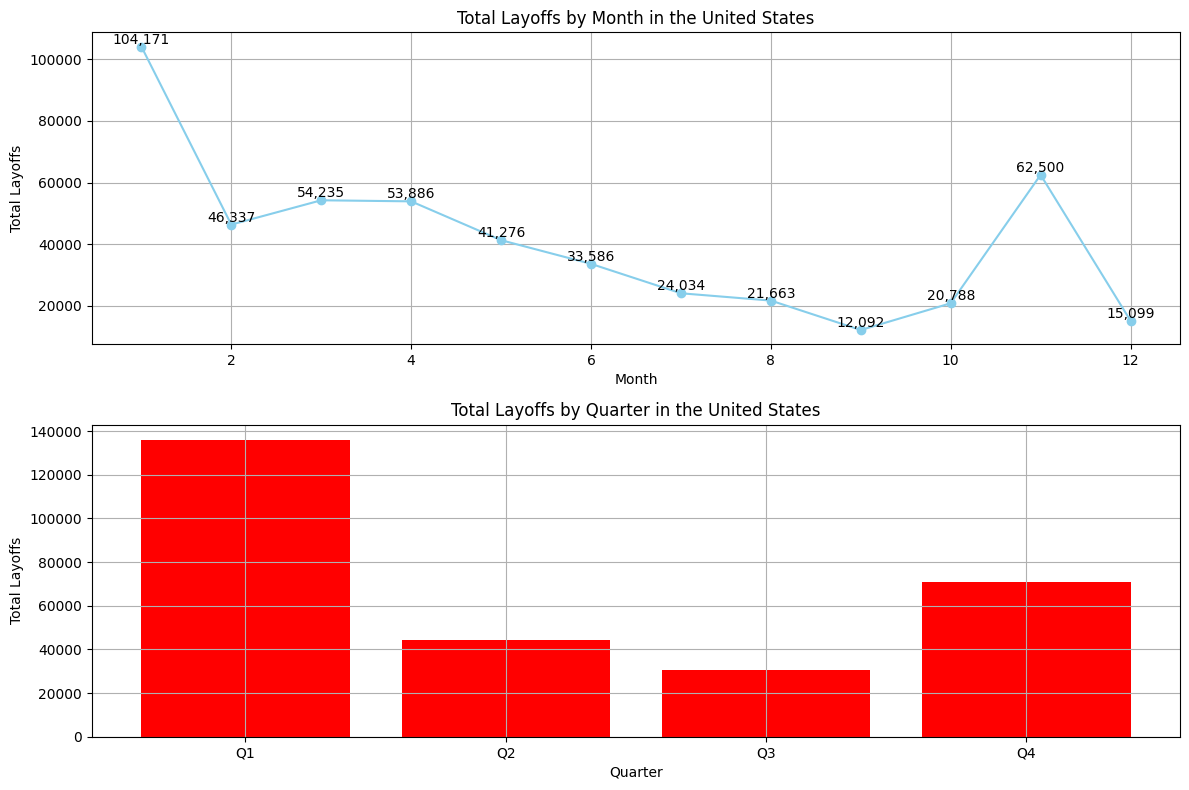

In [71]:
# Convert 'year', 'month', and 'day' columns to datetime format
US_df['Date'] = pd.to_datetime(US_df[['year', 'month', 'day']])

# Group data by month and quarter, and sum up 'total_laid_off' within each group
layoffs_by_month = US_df.groupby(US_df['Date'].dt.month)['total_laid_off'].sum()
layoffs_by_quarter = US_df.groupby(US_df['Date'].dt.to_period('Q'))['total_laid_off'].sum()

# Plotting the trend of layoffs over time
plt.figure(figsize=(12, 8))

# Plotting layoffs by month
plt.subplot(2, 1, 1)
plt.plot(layoffs_by_month.index, layoffs_by_month.values, marker='o', linestyle='-', color='skyblue')
for month, value in zip(layoffs_by_month.index, layoffs_by_month.values):
    plt.text(month, value, f'{value:,}', ha='center', va='bottom')
plt.title('Total Layoffs by Month in the United States')
plt.xlabel('Month')
plt.ylabel('Total Layoffs')
plt.grid(True)

# Plotting layoffs by quarter
plt.subplot(2, 1, 2)
quarters = [f'Q{q}' for q in layoffs_by_quarter.index.quarter]
plt.bar(quarters, layoffs_by_quarter.values, color='red')
plt.title('Total Layoffs by Quarter in the United States')
plt.xlabel('Quarter')
plt.ylabel('Total Layoffs')
plt.grid(True)

plt.tight_layout()
plt.show()


## What is the relationship between the location of companies within the United States and the extent of their layoffs and fundraising activities?

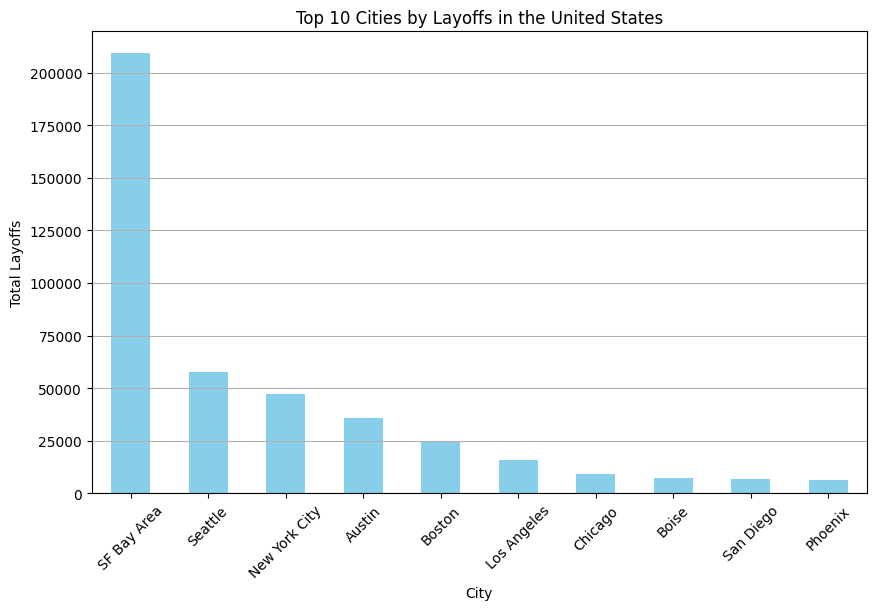

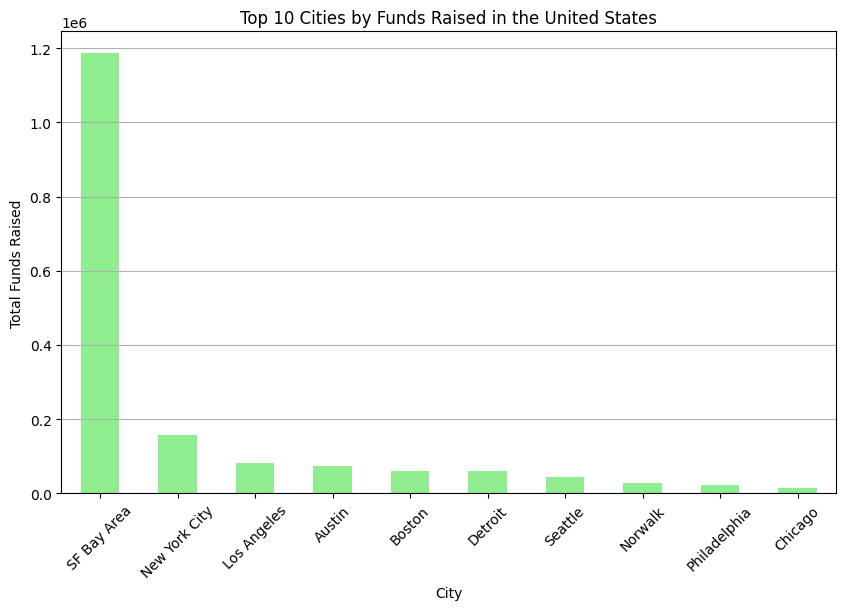

In [72]:
# Group data by 'location' and sum up the layoffs for each city
layoffs_by_city = US_df.groupby('location')['total_laid_off'].sum()

# Sort the cities by the number of layoffs in descending order and select the top 10
top_10_layoffs_cities = layoffs_by_city.sort_values(ascending=False).head(10)

# Plotting top 10 cities by layoffs
plt.figure(figsize=(10, 6))
top_10_layoffs_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Layoffs in the United States')
plt.xlabel('City')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group data by 'location' and sum up the funds raised for each city
funds_raised_by_city = US_df.groupby('location')['funds_raised'].sum()

# Sort the cities by funds raised in descending order and select the top 10
top_10_funds_raised_cities = funds_raised_by_city.sort_values(ascending=False).head(10)

# Plotting top 10 cities by funds raised
plt.figure(figsize=(10, 6))
top_10_funds_raised_cities.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities by Funds Raised in the United States')
plt.xlabel('City')
plt.ylabel('Total Funds Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Mean Squared Error: 40909966.530084915


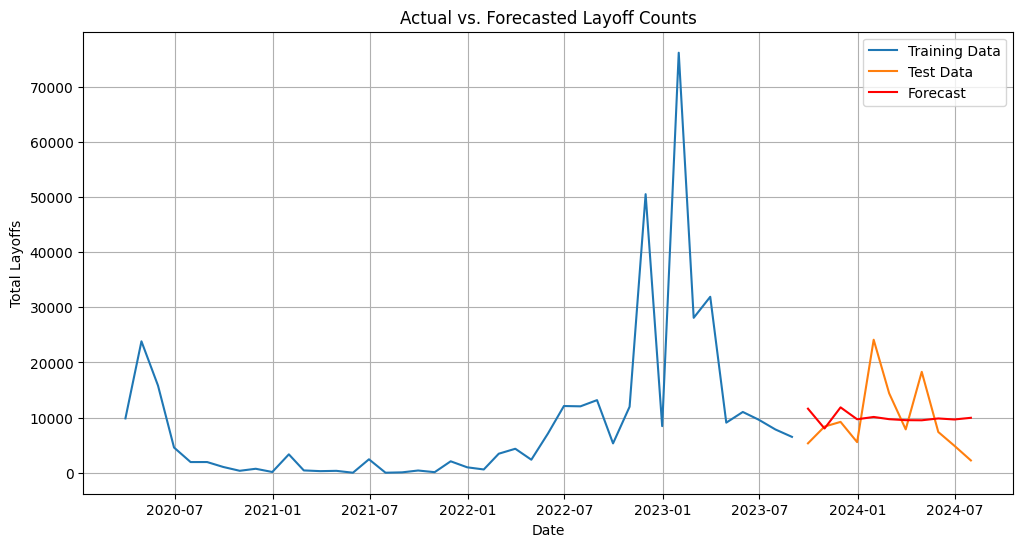

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named US_df and contains 'Date' and 'total_laid_off' columns
# Convert 'Date' column to datetime format
US_df['Date'] = pd.to_datetime(US_df['Date'])

# Set 'Date' column as index
US_df.set_index('Date', inplace=True)

# Resample data to a monthly frequency and sum layoff counts
monthly_layoffs = US_df['total_laid_off'].resample('M').sum()

# Split data into training and testing sets
train_size = int(len(monthly_layoffs) * 0.8)
train, test = monthly_layoffs[:train_size], monthly_layoffs[train_size:]

# Define and fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast layoff counts
forecast = model_fit.forecast(steps=len(test))

# Calculate mean squared error
mse = mean_squared_error(test, forecast)
print('Mean Squared Error:', mse)

# Plot actual vs. forecasted layoff counts
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Total Layoffs')
plt.title('Actual vs. Forecasted Layoff Counts')
plt.legend()
plt.grid(True)
plt.show()
